In [1]:
# Importing the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import zscore
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn import metrics

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing the data.
df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset3/main/weatherAUS.csv')

In [3]:
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8420,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
8421,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
8422,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
8423,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


In [4]:
# Checking the size of the dataset
df.shape

(8425, 23)

In [5]:
# Checking the column names of the dataset
df.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [6]:
#  Getting the information of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8425 entries, 0 to 8424
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           8425 non-null   object 
 1   Location       8425 non-null   object 
 2   MinTemp        8350 non-null   float64
 3   MaxTemp        8365 non-null   float64
 4   Rainfall       8185 non-null   float64
 5   Evaporation    4913 non-null   float64
 6   Sunshine       4431 non-null   float64
 7   WindGustDir    7434 non-null   object 
 8   WindGustSpeed  7434 non-null   float64
 9   WindDir9am     7596 non-null   object 
 10  WindDir3pm     8117 non-null   object 
 11  WindSpeed9am   8349 non-null   float64
 12  WindSpeed3pm   8318 non-null   float64
 13  Humidity9am    8366 non-null   float64
 14  Humidity3pm    8323 non-null   float64
 15  Pressure9am    7116 non-null   float64
 16  Pressure3pm    7113 non-null   float64
 17  Cloud9am       6004 non-null   float64
 18  Cloud3pm

In [7]:
# Checking the data types
df.dtypes

Date              object
Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday         object
RainTomorrow      object
dtype: object

There are both float and object datatype.

In [8]:
# Checking for unique numbers 
df.nunique()

Date             3004
Location           12
MinTemp           285
MaxTemp           331
Rainfall          250
Evaporation       116
Sunshine          140
WindGustDir        16
WindGustSpeed      52
WindDir9am         16
WindDir3pm         16
WindSpeed9am       34
WindSpeed3pm       35
Humidity9am        90
Humidity3pm        94
Pressure9am       384
Pressure3pm       374
Cloud9am            9
Cloud3pm            9
Temp9am           304
Temp3pm           328
RainToday           2
RainTomorrow        2
dtype: int64

'RainTomorrow' has 2 classes which means it ia a  classification problem while predicting tomorrows rainfall. The other target 'Rainfall' is a continuous data so it is a regression problem.

In [9]:
# Checking for any null values 
df.isnull().sum()

Date                0
Location            0
MinTemp            75
MaxTemp            60
Rainfall          240
Evaporation      3512
Sunshine         3994
WindGustDir       991
WindGustSpeed     991
WindDir9am        829
WindDir3pm        308
WindSpeed9am       76
WindSpeed3pm      107
Humidity9am        59
Humidity3pm       102
Pressure9am      1309
Pressure3pm      1312
Cloud9am         2421
Cloud3pm         2455
Temp9am            56
Temp3pm            96
RainToday         240
RainTomorrow      239
dtype: int64

<AxesSubplot:>

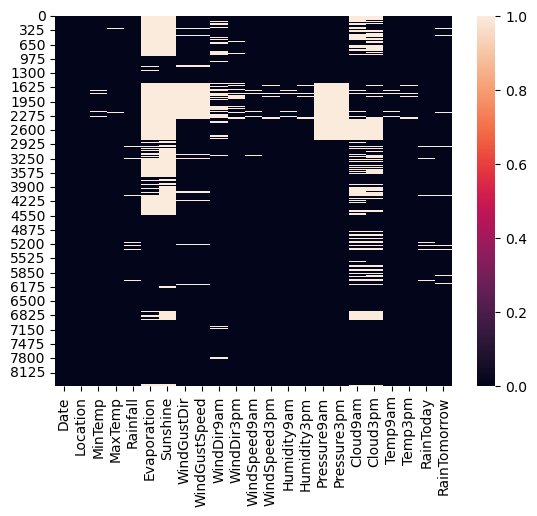

In [10]:
sns.heatmap(df.isnull())

Almost all of the features have null values.

In [11]:
# Checking the value counts of each columns
for i in df.columns:
    print(df[i].value_counts())
    print('_________________________________')

2011-01-31    5
2011-05-08    5
2011-05-21    5
2011-05-20    5
2011-05-19    5
             ..
2013-01-28    1
2013-01-29    1
2013-01-30    1
2013-01-31    1
2013-06-08    1
Name: Date, Length: 3004, dtype: int64
_________________________________
Melbourne       1622
Williamtown     1230
PerthAirport    1204
Albury           907
Newcastle        822
CoffsHarbour     611
Brisbane         579
Penrith          482
Wollongong       474
Darwin           250
Adelaide         205
Uluru             39
Name: Location, dtype: int64
_________________________________
 12.0    74
 13.2    71
 13.8    69
 12.7    68
 16.4    67
         ..
 0.3      1
 28.3     1
-1.1      1
-1.4      1
 26.0     1
Name: MinTemp, Length: 285, dtype: int64
_________________________________
19.0    87
23.8    75
19.8    74
25.0    71
22.0    68
        ..
11.2     1
43.1     1
42.7     1
42.9     1
43.5     1
Name: MaxTemp, Length: 331, dtype: int64
_________________________________
0.0      5299
0.2       406
0.4  

 The target variable rain tomorrow is imbalanced have to use SMOTE method.

Data Cleaning

In [12]:
df['Date'] = pd.to_datetime(df['Date'])

In [13]:
df.dtypes

Date             datetime64[ns]
Location                 object
MinTemp                 float64
MaxTemp                 float64
Rainfall                float64
Evaporation             float64
Sunshine                float64
WindGustDir              object
WindGustSpeed           float64
WindDir9am               object
WindDir3pm               object
WindSpeed9am            float64
WindSpeed3pm            float64
Humidity9am             float64
Humidity3pm             float64
Pressure9am             float64
Pressure3pm             float64
Cloud9am                float64
Cloud3pm                float64
Temp9am                 float64
Temp3pm                 float64
RainToday                object
RainTomorrow             object
dtype: object

In [14]:
#Extracting Day from Date_of_journey column
df['Day'] = pd.to_datetime(df.Date,format="%d/%m/%Y").dt.day

#Extracting Month from Date_of_journey column
df['Month'] = pd.to_datetime(df.Date, format="%d/%m/%Y").dt.month

#Extracting Year from Date_of_journey column
df['Year'] = pd.to_datetime(df.Date, format="%d/%m/%Y").dt.year

In [15]:
df.drop(columns=['Date'],axis=1,inplace=True)

In [16]:
df.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Day,Month,Year
0,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,...,1007.1,8.0,NaN,16.9,21.8,No,No,1,12,2008
1,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,...,1007.8,NaN,NaN,17.2,24.3,No,No,2,12,2008
2,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,...,1008.7,NaN,2.0,21.0,23.2,No,No,3,12,2008
3,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,...,1012.8,NaN,NaN,18.1,26.5,No,No,4,12,2008
4,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,...,1006.0,7.0,8.0,17.8,29.7,No,No,5,12,2008


Treating the Null Values by Imputation

In [17]:
#Filling null values in MinTemp with it's mean
df['MinTemp'] = df['MinTemp'].fillna(df['MinTemp'].mean())

#Filling null values in MaxTemp with it's mean
df['MaxTemp'] = df['MaxTemp'].fillna(df['MaxTemp'].mean())

#Filling null values in Rainfall with it's mode, as most of the rows have 0 rainfall.
df['Rainfall'] = df['Rainfall'].fillna(df['Rainfall'].mode()[0])

#Filling null values in Evaporation with it's mean
df['Evaporation'] = df['Evaporation'].fillna(df['Evaporation'].mean())

#Filling null values in Sunshine with it's mean
df['Sunshine'] = df['Sunshine'].fillna(df['Sunshine'].mean())

#Filling null values in WindGustDir with it's mode
df['WindGustDir'] = df['WindGustDir'].fillna(df['WindGustDir'].mode()[0])

#Filling null values in WindGustSpeed with it's mean
df['WindGustSpeed'] = df['WindGustSpeed'].fillna(df['WindGustSpeed'].mean())

#Filling null values in WindDir9am with it's mode
df['WindDir9am'] = df['WindDir9am'].fillna(df['WindDir9am'].mode()[0])

#Filling null values in WindDir3pm with it's mode
df['WindDir3pm'] = df['WindDir3pm'].fillna(df['WindDir3pm'].mode()[0])

#Filling null values in WindSpeed9am with it's mean
df['WindSpeed9am'] = df['WindSpeed9am'].fillna(df['WindSpeed9am'].mean())

#Filling null values in WindSpeed3pm with it's mean
df['WindSpeed3pm'] = df['WindSpeed3pm'].fillna(df['WindSpeed3pm'].mean())

#Filling null values in Humidity9am with it's mean
df['Humidity9am'] = df['Humidity9am'].fillna(df['Humidity9am'].mean())

#Filling null values in Humidity3pm with it's mean
df['Humidity3pm'] = df['Humidity3pm'].fillna(df['Humidity3pm'].mean())

#Filling null values in Pressure9am with it's mean
df['Pressure9am'] = df['Pressure9am'].fillna(df['Pressure9am'].mean())

#Filling null values in Pressure3pm with it's mean
df['Pressure3pm'] = df['Pressure3pm'].fillna(df['Pressure3pm'].mean())

#Filling null values in Cloud9am with it's mean
df['Cloud9am'] = df['Cloud9am'].fillna(df['Cloud9am'].mean())

#Filling null values in Cloud3pm with it's mean
df['Cloud3pm'] = df['Cloud3pm'].fillna(df['Cloud3pm'].mean())

#Filling null values in Temp9am with it's mean
df['Temp9am'] = df['Temp9am'].fillna(df['Temp9am'].mean())

#Filling null values in Temp3pm with it's mean
df['Temp3pm'] = df['Temp3pm'].fillna(df['Temp3pm'].mean())

#Filling null values in Temp3pm with it's mean
df['Temp3pm'] = df['Temp3pm'].fillna(df['Temp3pm'].mean())

#Filling null values in RainToday with it's mode
df['RainToday'] = df['RainToday'].fillna(df['RainToday'].mode()[0])

#Filling null values in RainTomorrow with it's mode
df['RainTomorrow'] = df['RainTomorrow'].fillna(df['RainTomorrow'].mode()[0])

In [18]:
df.isnull().sum()

Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
Day              0
Month            0
Year             0
dtype: int64

All the null values are removed

<AxesSubplot:>

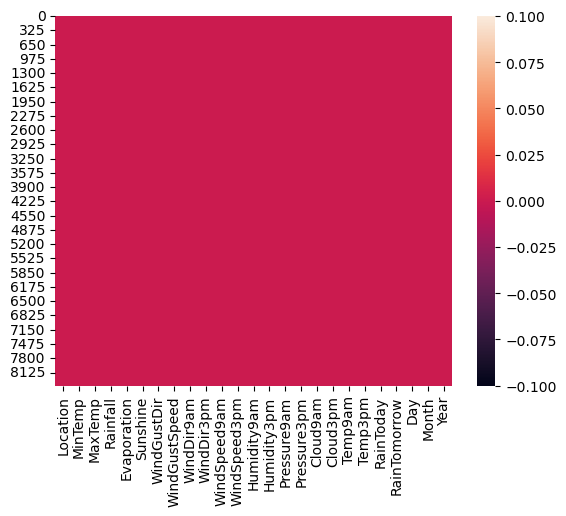

In [19]:
sns.heatmap(df.isnull())

Statistical Summary of the Dataset

In [20]:
df.describe(include="all")

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Day,Month,Year
count,8425,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425,8425.000000,8425,8425,...,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425,8425,8425.000000,8425.000000,8425.000000
unique,12,NaN,NaN,NaN,NaN,NaN,16,NaN,16,16,...,NaN,NaN,NaN,NaN,NaN,2,2,NaN,NaN,NaN
top,Melbourne,NaN,NaN,NaN,NaN,NaN,N,NaN,N,SE,...,NaN,NaN,NaN,NaN,NaN,No,No,NaN,NaN,NaN
freq,1622,NaN,NaN,NaN,NaN,NaN,1704,NaN,1735,1121,...,NaN,NaN,NaN,NaN,NaN,6435,6434,NaN,NaN,NaN
mean,NaN,13.193305,23.859976,2.725982,5.389395,7.632205,NaN,40.174469,NaN,NaN,...,1015.236075,4.566622,4.503183,17.762015,22.442934,NaN,NaN,15.741958,6.442136,2012.102433
std,NaN,5.379488,6.114516,10.319872,3.852004,2.825451,NaN,13.776101,NaN,NaN,...,6.217451,2.429205,2.299419,5.608301,5.945849,NaN,NaN,8.787354,3.437994,2.473137
min,NaN,-2.000000,8.200000,0.000000,0.000000,0.000000,NaN,7.000000,NaN,NaN,...,982.900000,0.000000,0.000000,1.900000,7.300000,NaN,NaN,1.000000,1.000000,2008.000000
25%,NaN,9.300000,19.300000,0.000000,4.000000,7.632205,NaN,31.000000,NaN,NaN,...,1011.400000,3.000000,3.000000,13.800000,18.100000,NaN,NaN,8.000000,3.000000,2010.000000
50%,NaN,13.200000,23.300000,0.000000,5.389395,7.632205,NaN,40.174469,NaN,NaN,...,1015.236075,4.566622,4.503183,17.762015,22.000000,NaN,NaN,16.000000,6.000000,2011.000000
75%,NaN,17.300000,28.000000,0.800000,5.389395,8.900000,NaN,48.000000,NaN,NaN,...,1018.800000,7.000000,7.000000,21.900000,26.300000,NaN,NaN,23.000000,9.000000,2014.000000


In [21]:
df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Location,8425,12,Melbourne,1622,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MinTemp,8425.0,NaN,NaN,NaN,13.193305,5.379488,-2.0,9.3,13.2,17.3,28.5
MaxTemp,8425.0,NaN,NaN,NaN,23.859976,6.114516,8.2,19.3,23.3,28.0,45.5
Rainfall,8425.0,NaN,NaN,NaN,2.725982,10.319872,0.0,0.0,0.0,0.8,371.0
Evaporation,8425.0,NaN,NaN,NaN,5.389395,3.852004,0.0,4.0,5.389395,5.389395,145.0
Sunshine,8425.0,NaN,NaN,NaN,7.632205,2.825451,0.0,7.632205,7.632205,8.9,13.9
WindGustDir,8425,16,N,1704,NaN,NaN,NaN,NaN,NaN,NaN,NaN
WindGustSpeed,8425.0,NaN,NaN,NaN,40.174469,13.776101,7.0,31.0,40.174469,48.0,107.0
WindDir9am,8425,16,N,1735,NaN,NaN,NaN,NaN,NaN,NaN,NaN
WindDir3pm,8425,16,SE,1121,NaN,NaN,NaN,NaN,NaN,NaN,NaN


No Negative or invalid values present in dataset

Data Visualization

In [22]:
# Checking for categorical columns
cat_col=[]
for i in df.dtypes.index:
    if df.dtypes[i]=='object':
        cat_col.append(i)
print(cat_col)

['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']


In [23]:
# checking for numerical columns
num_col=[]
for i in df.dtypes.index:
    if df.dtypes[i]!='object':
        num_col.append(i)
print(num_col)

['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'Day', 'Month', 'Year']


Univariate Analysis of the categorical columns

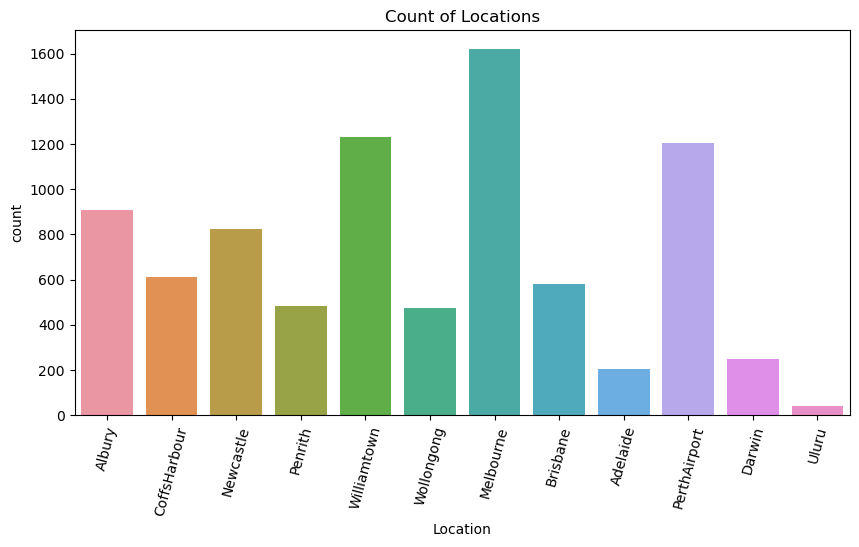

In [24]:
# Visualizing the various Locations present in the dataset
plt.figure(figsize=(10,5))
sns.countplot(df["Location"])
plt.title("Count of Locations")
plt.xticks(rotation=75)
plt.show()

Findings--The highest rainfall data from Melbourbne and least from Uluru

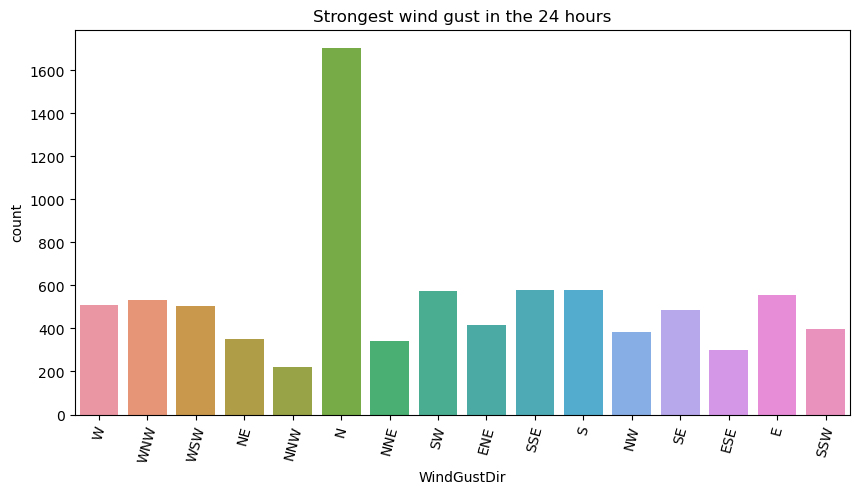

In [25]:
# Visualizing the direction of the strongest wind gust in the 24 hours to midnight
plt.figure(figsize=(10,5))
sns.countplot(df["WindGustDir"])
plt.title("Strongest wind gust in the 24 hours")
plt.xticks(rotation=75)
plt.show()

 Findings--The wind gust was strongest towards the north, followed by the SW, SSE, S, WNW.

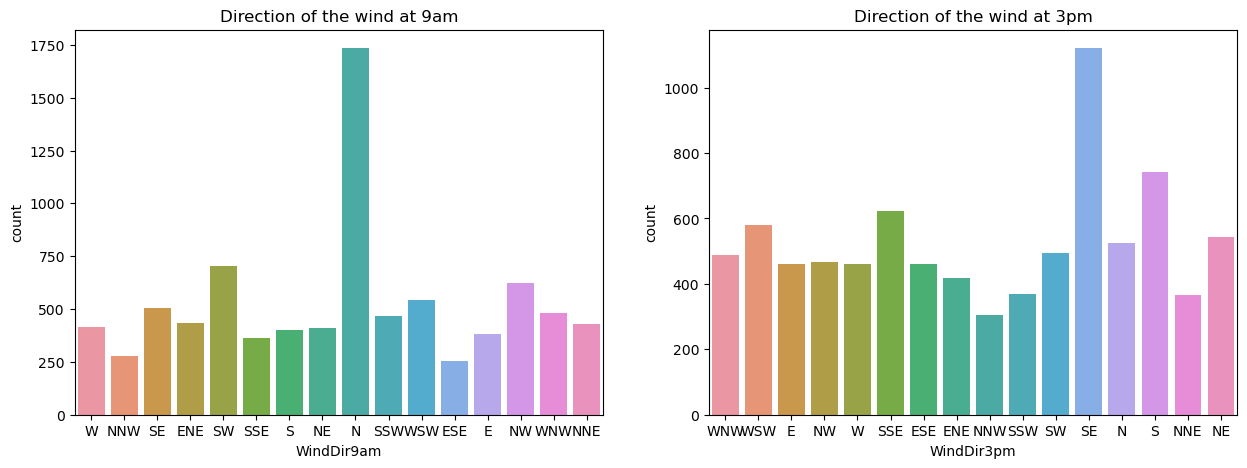

In [26]:
#Visualization of wind at 9 am and 3pm.
plt.figure(figsize=(15,5))
plt.subplot(1, 2, 1)
plt.title('Direction of the wind at 9am')
sns.countplot(df['WindDir9am'])
plt.subplot(1,2,2)
plt.title('Direction of the wind at 3pm')
sns.countplot(df['WindDir3pm'])
plt.show()

Findings--The wing direction was towards the N at 9am and in the SE at 3pm

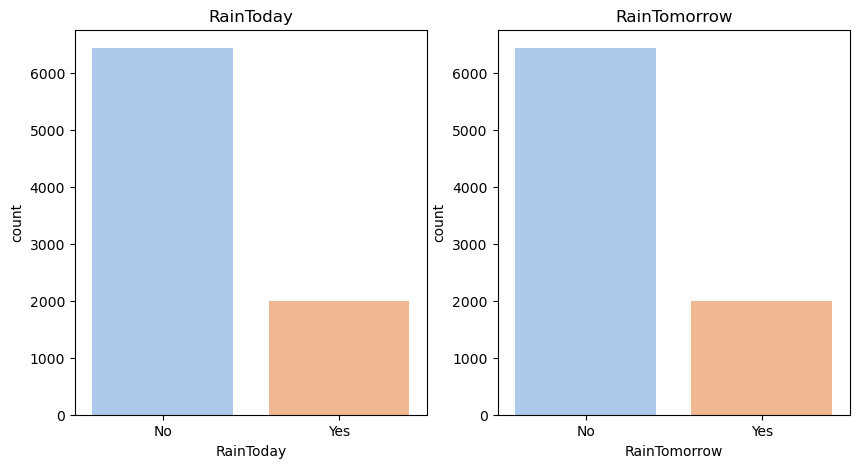

In [27]:
#Visualization of Rainfall today and tomorrow:
plt.figure(figsize=(10,5))
plt.subplot(1, 2, 1)
plt.title('RainToday')
sns.countplot(df['RainToday'],palette='pastel')
plt.subplot(1,2,2)
plt.title('RainTomorrow')
sns.countplot(df['RainTomorrow'], palette='pastel')
plt.show()

Findings-- There is hardly any difference in the rainfall today and tomorrow

In [28]:
len(num_col)

19

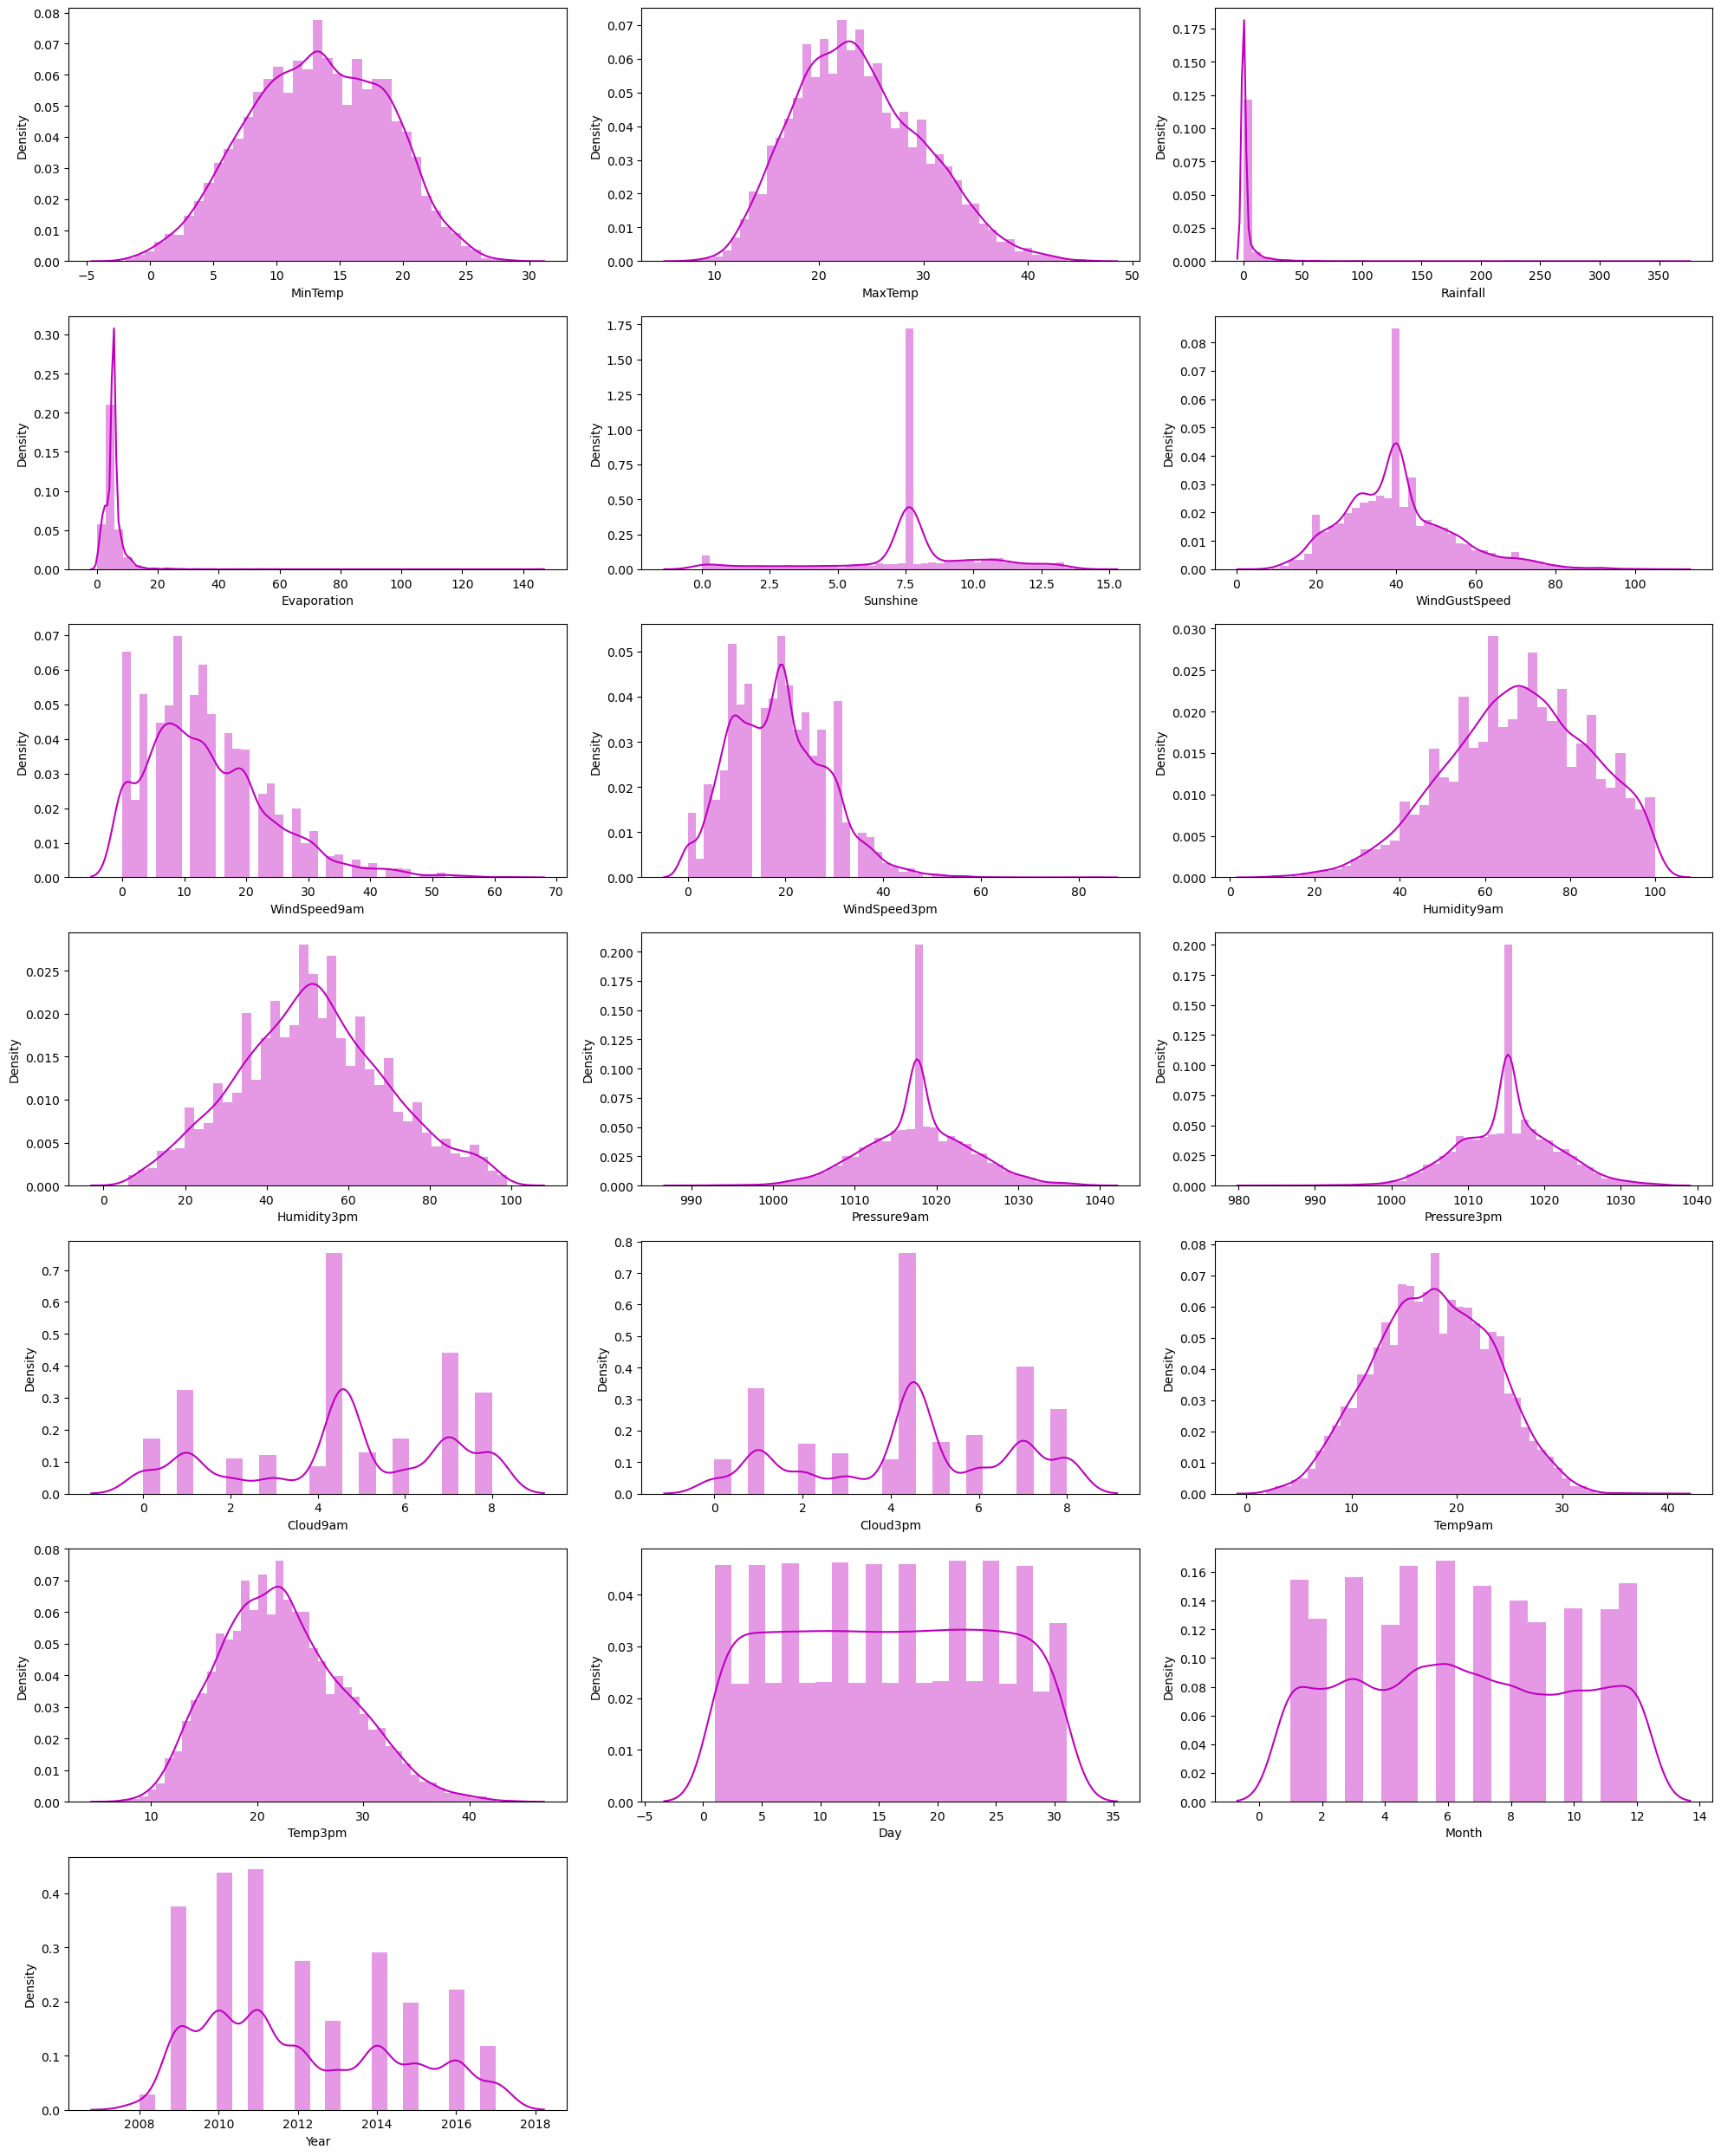

In [29]:
plt.figure(figsize=(20,25),facecolor='white')
plotnumber=1
for column in num_col:
    if plotnumber<=20:
        ax=plt.subplot(7,3,plotnumber)
        sns.distplot(df[column],color="m")
        plt.xlabel(column,fontsize=10)
        plt.yticks(rotation=0,fontsize=10)
    plotnumber+=1
plt.tight_layout()

Findings--
1.Mininum Temp is normally distributed.
2.Maximum Temp is slightly skewed.
3.Rainfall and Evaporation is more skewed.
4.Sunshine is not normally distributed.
5.WindGustSpeed, WindSpeed9am,WindSpeed3pm is more skewed.
5.Humidity9am is slightly skewed and Humidity3pm is normally distributed.
5.Pressure9am, Pressure3pm, Cloud9am, Cloud3pm, Temp9am, Temp3pm, Day, Month and Year has no skewness but the data is not distributed uniformly.

Bivariate Analysis

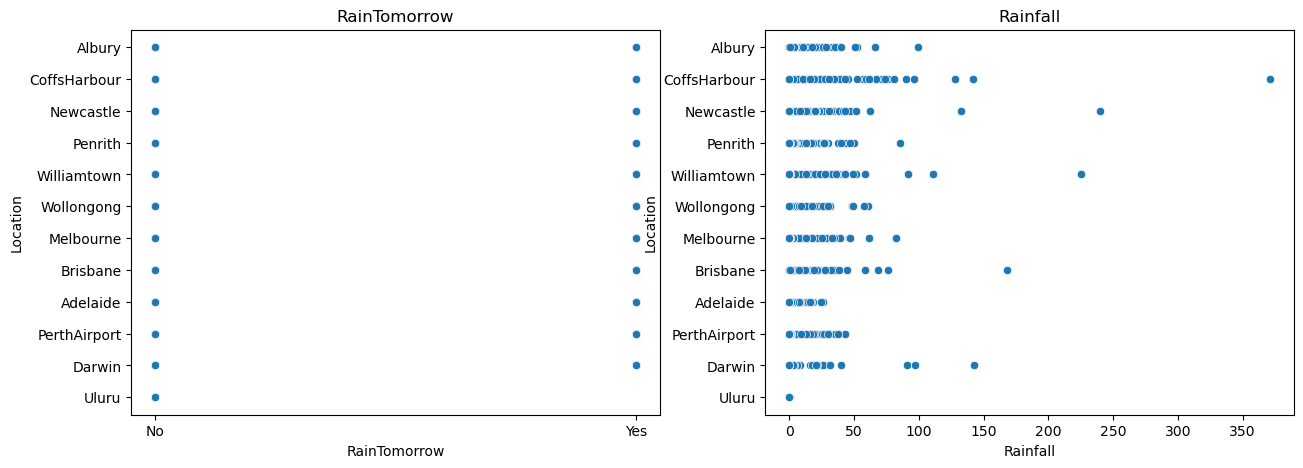

In [30]:
# Checking the corelation between location with both the target Variables (Rainfall and Rain Tommorow)
plt.figure(figsize=(15,5))
plt.subplot(1, 2, 1)
plt.title('RainTomorrow')
sns.scatterplot(x='RainTomorrow',y='Location',data=df)
plt.subplot(1,2,2)
plt.title('Rainfall')
sns.scatterplot(x='Rainfall',y='Location',data=df)
plt.show()

Findings--Location does not have any major impact on the prediction of rainfall, however we will not drop the feature as prediction is done as per region.

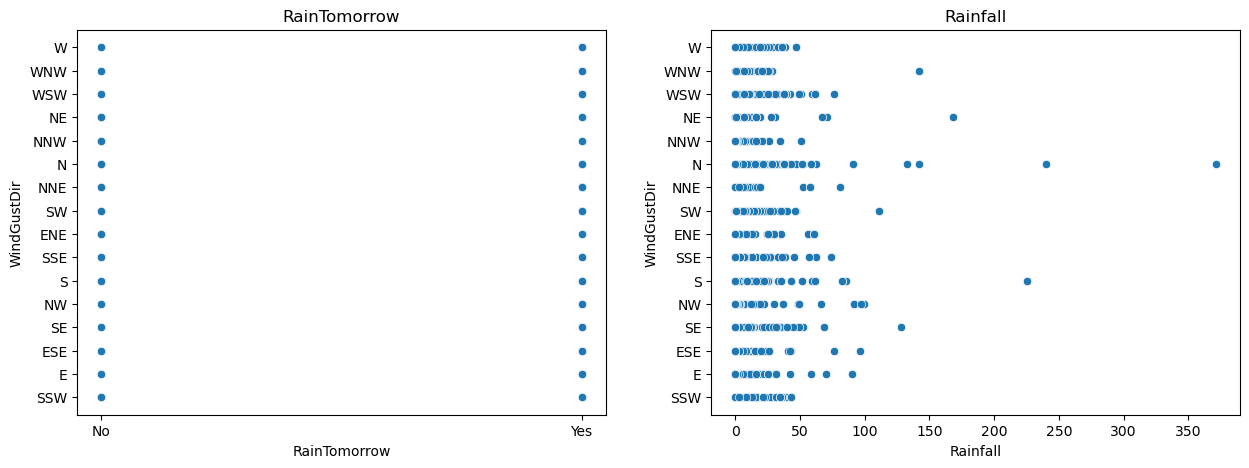

In [31]:
# Checking the corelation between WindGustDir with both the target variable
plt.figure(figsize=(15,5))
plt.subplot(1, 2, 1)
plt.title('RainTomorrow')
sns.scatterplot(x='RainTomorrow',y='WindGustDir',data=df)
plt.subplot(1,2,2)
plt.title('Rainfall')
sns.scatterplot(x='Rainfall',y='WindGustDir',data=df)
plt.show()

Findings--There is no linear relation of the feature with both the targets

<AxesSubplot:xlabel='WindDir3pm', ylabel='Rainfall'>

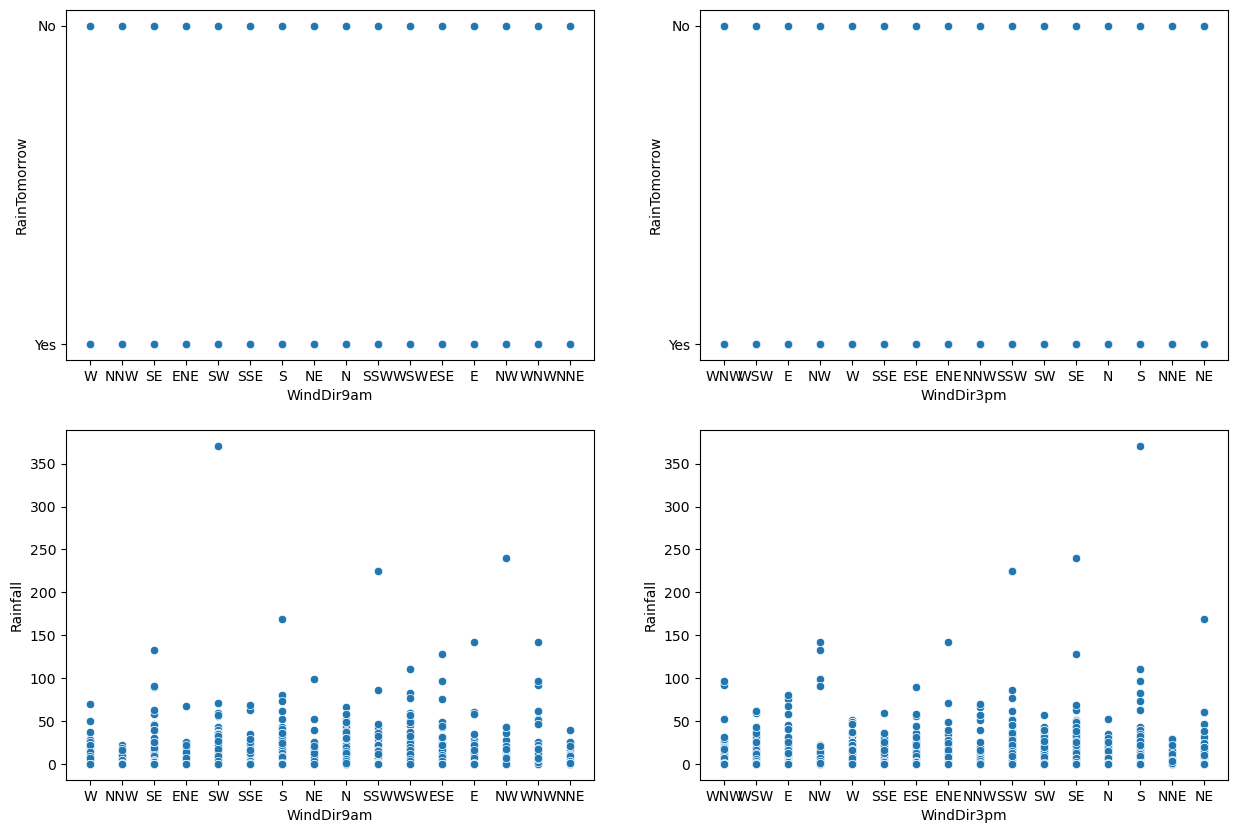

In [32]:
fig,axes=plt.subplots(2,2,figsize=(15,10))

#checking the relation between WindDir9am and RainTomorrow
sns.scatterplot(x='WindDir9am',y='RainTomorrow',ax=axes[0,0],palette="OrRd",data=df)

#checking the relation between WindDir3pm and RainTomorrow
sns.scatterplot(x='WindDir3pm',y='RainTomorrow',ax=axes[0,1],palette="OrRd",data=df)

#checking the relation between WindDir9am and Rainfall
sns.scatterplot(x='WindDir9am',y='Rainfall',ax=axes[1,0],palette="OrRd",data=df)

#checking the relation between WindDir3pm and Rainfall
sns.scatterplot(x='WindDir3pm',y='Rainfall',ax=axes[1,1],palette="OrRd",data=df)

Findings--There is no linear relation in between the variables

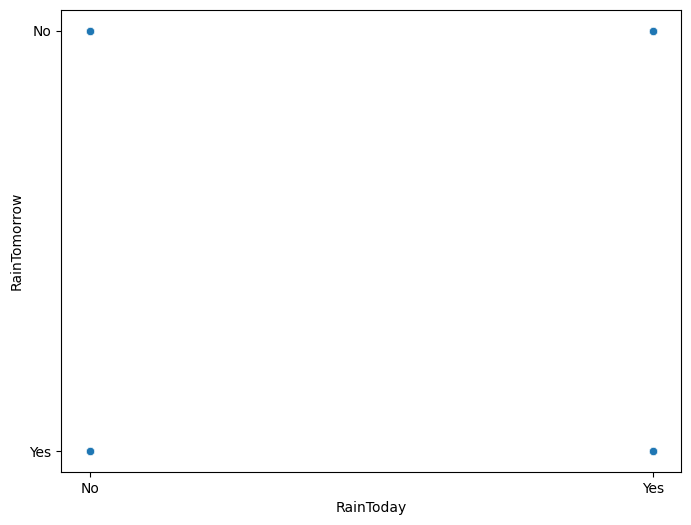

In [33]:
# Checking the relation between Rainfall today and Rainfall Tomorrow
plt.figure(figsize=(8,6))
sns.scatterplot(x=df['RainToday'],y=df['RainTomorrow'])
plt.show()

Findings--There is no relation seen in the scatter plot.

<AxesSubplot:xlabel='MaxTemp', ylabel='Rainfall'>

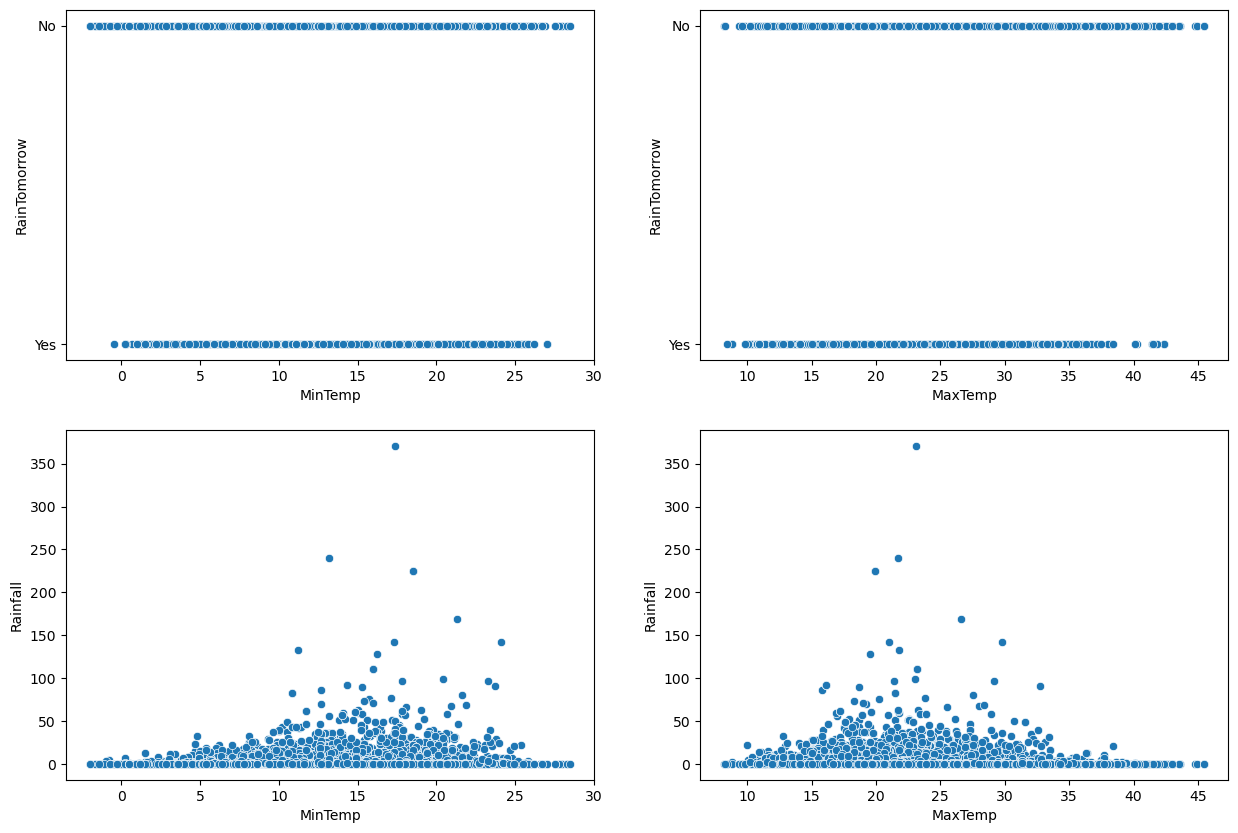

In [34]:
fig,axes=plt.subplots(2,2,figsize=(15,10))

#checking the relation between minimum temperature and RainTomorrow
sns.scatterplot(x='MinTemp',y='RainTomorrow',ax=axes[0,0],palette="green",data=df)

#checking the relation between max temperature and RainTomorrow
sns.scatterplot(x='MaxTemp',y='RainTomorrow',ax=axes[0,1],palette="OrRd",data=df)

#checking the relation between minimum temperature and Rainfall
sns.scatterplot(x='MinTemp',y='Rainfall',ax=axes[1,0],palette="OrRd",data=df)

#checking the relation between max temperature and Rainfall
sns.scatterplot(x='MaxTemp',y='Rainfall',ax=axes[1,1],palette="OrRd",data=df)

Findings--There is no linear relation of max temp and min temp with both the target varaibles

<AxesSubplot:xlabel='Sunshine', ylabel='Rainfall'>

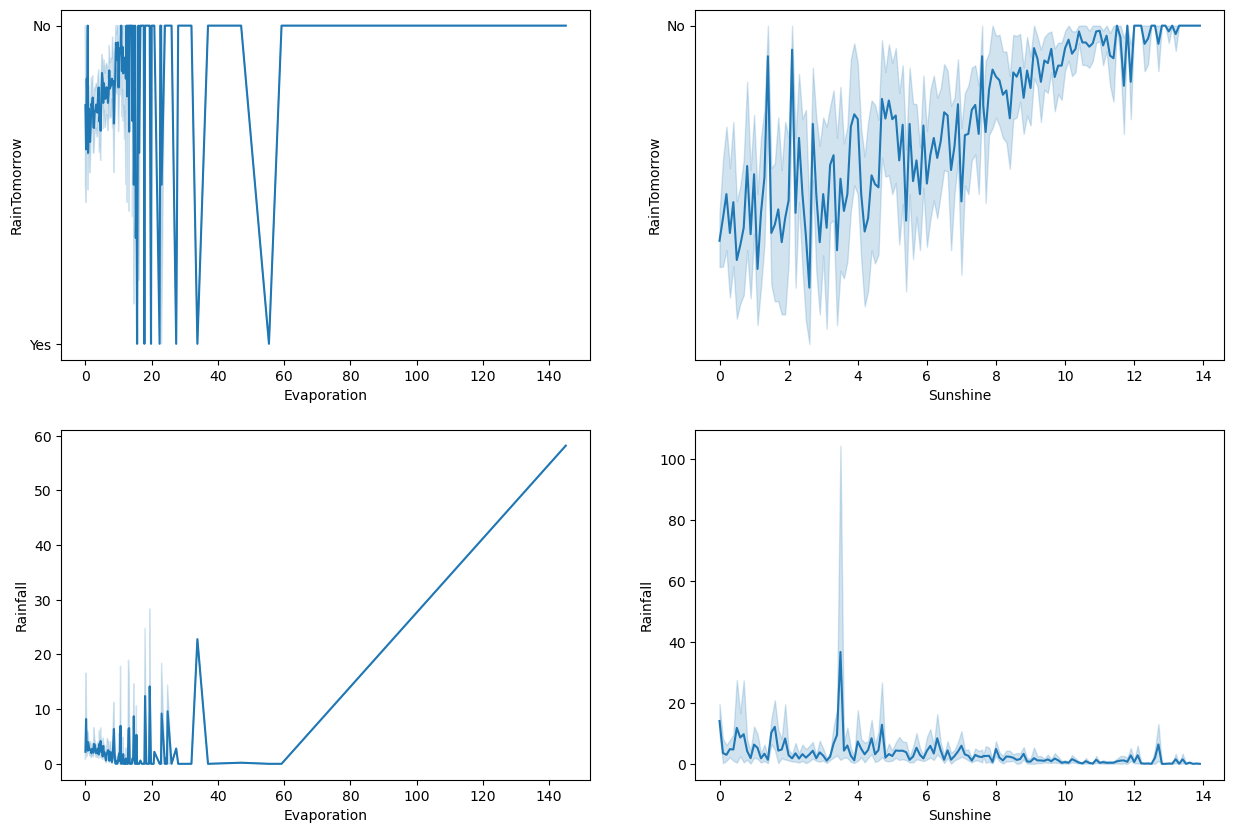

In [35]:
fig,axes=plt.subplots(2,2,figsize=(15,10))

#checking the relation between Evaporation and RainTomorrow
sns.lineplot(x='Evaporation',y='RainTomorrow',ax=axes[0,0],palette="OrRd",data=df)

#checking the relation between Sunshine and RainTomorrow
sns.lineplot(x='Sunshine',y='RainTomorrow',ax=axes[0,1],palette="OrRd",data=df)

#checking the relation between Evaporation and Rainfall
sns.lineplot(x='Evaporation',y='Rainfall',ax=axes[1,0],palette="OrRd",data=df)

#checking the relation between Sunshine and Rainfall
sns.lineplot(x='Sunshine',y='Rainfall',ax=axes[1,1],palette="OrRd",data=df)

Findings-- There is a relation seen in the graphs

<AxesSubplot:xlabel='WindSpeed3pm', ylabel='Rainfall'>

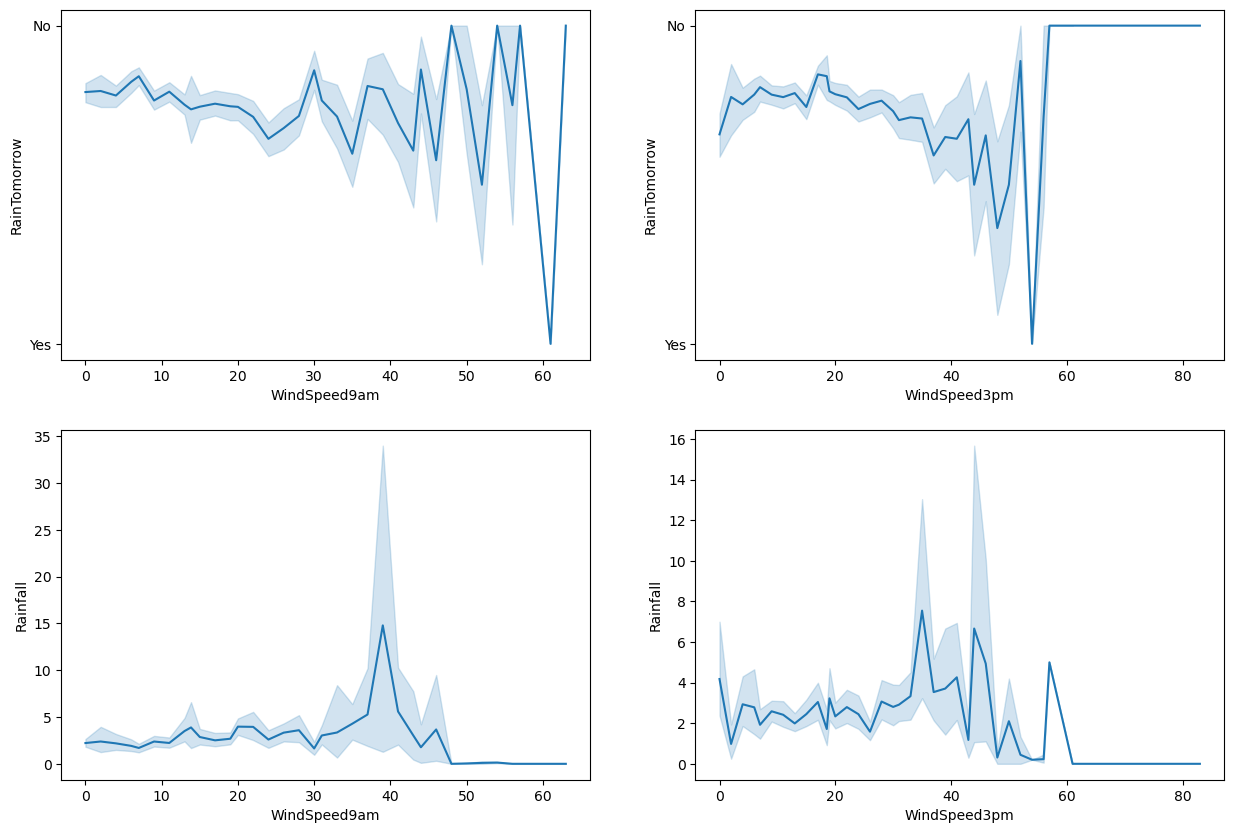

In [36]:
fig,axes=plt.subplots(2,2,figsize=(15,10))

#checking the relation between WindSpeed9am and RainTomorrow
sns.lineplot(x='WindSpeed9am',y='RainTomorrow',ax=axes[0,0],palette="OrRd",data=df)

#checking the relation between WindSpeed3pm and RainTomorrow
sns.lineplot(x='WindSpeed3pm',y='RainTomorrow',ax=axes[0,1],palette="OrRd",data=df)

#checking the relation between WindSpeed9am and Rainfall
sns.lineplot(x='WindSpeed9am',y='Rainfall',ax=axes[1,0],palette="OrRd",data=df)

#checking the relation between WindSpeed3pm and Rainfall
sns.lineplot(x='WindSpeed3pm',y='Rainfall',ax=axes[1,1],palette="OrRd",data=df)

Findings--There is no linear relation seen in the graphs

<AxesSubplot:xlabel='Humidity3pm', ylabel='Rainfall'>

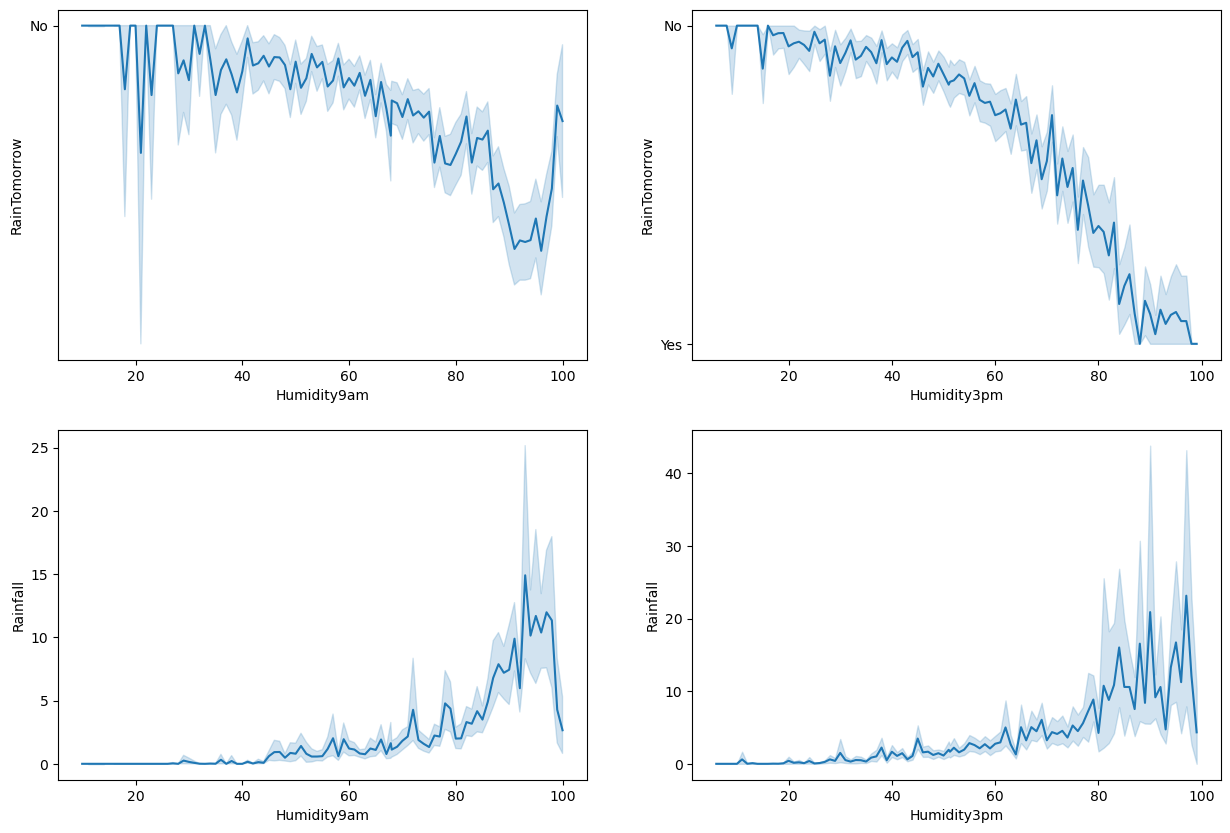

In [37]:
fig,axes=plt.subplots(2,2,figsize=(15,10))

#checking the relation between Humidity9am and RainTomorrow
sns.lineplot(x='Humidity9am',y='RainTomorrow',ax=axes[0,0],palette="OrRd",data=df)

#checking the relation between Humidity3pm and RainTomorrow
sns.lineplot(x='Humidity3pm',y='RainTomorrow',ax=axes[0,1],palette="OrRd",data=df)

#checking the relation between Humidity9am and Rainfall
sns.lineplot(x='Humidity9am',y='Rainfall',ax=axes[1,0],palette="OrRd",data=df)

#checking the relation between Humidity3pm and Rainfall
sns.lineplot(x='Humidity3pm',y='Rainfall',ax=axes[1,1],palette="OrRd",data=df)

Findings--There is a inverse relation in humidity with rain tomorrow and positive relation between humidity and Rainfall

<AxesSubplot:xlabel='Pressure3pm', ylabel='Rainfall'>

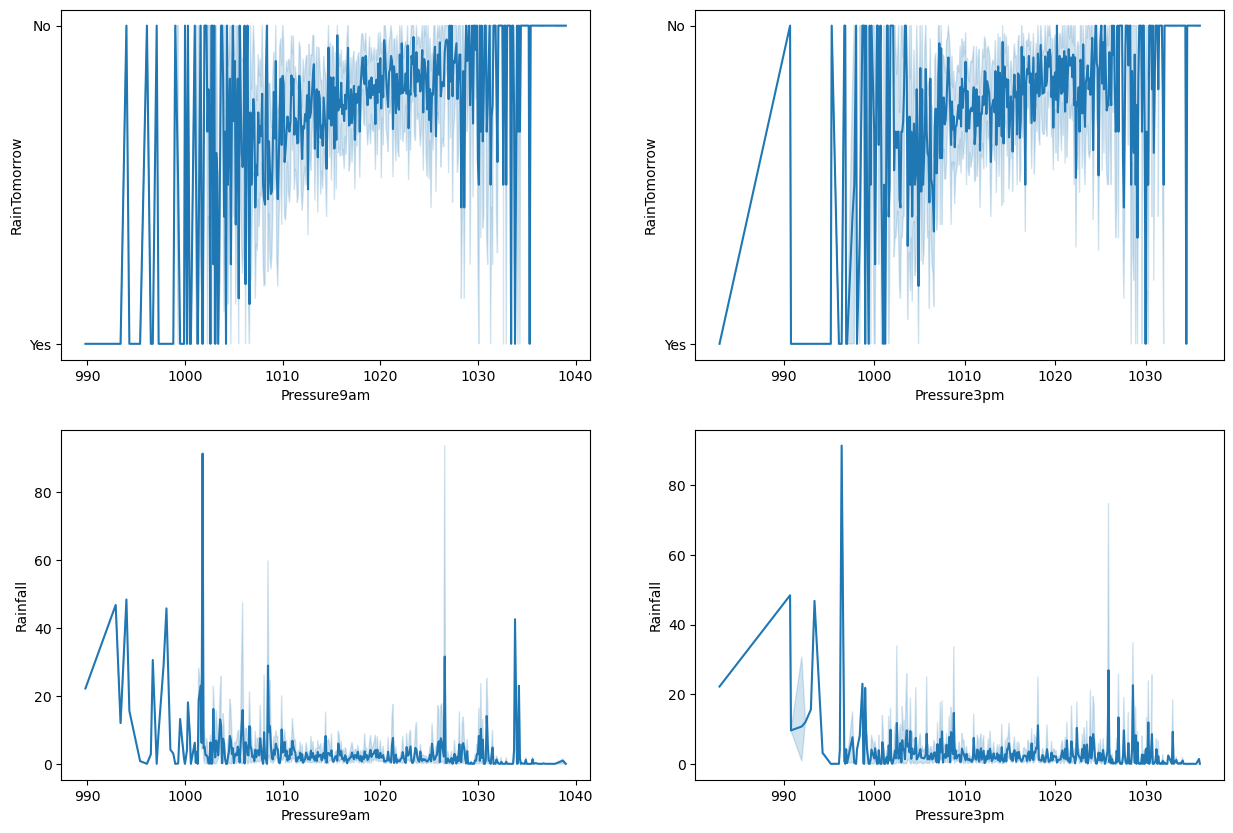

In [38]:
fig,axes=plt.subplots(2,2,figsize=(15,10))

#checking the relation between Pressure9am and RainTomorrow
sns.lineplot(x='Pressure9am',y='RainTomorrow',ax=axes[0,0],palette="OrRd",data=df)

#checking the relation between Pressure3pm and RainTomorrow
sns.lineplot(x='Pressure3pm',y='RainTomorrow',ax=axes[0,1],palette="OrRd",data=df)

#checking the relation between Pressure9am and Rainfall
sns.lineplot(x='Pressure9am',y='Rainfall',ax=axes[1,0],palette="OrRd",data=df)

#checking the relation between Pressure3pm and Rainfall
sns.lineplot(x='Pressure3pm',y='Rainfall',ax=axes[1,1],palette="OrRd",data=df)

Findings--There is no linear relation seen in the graph

<AxesSubplot:xlabel='Cloud3pm', ylabel='Rainfall'>

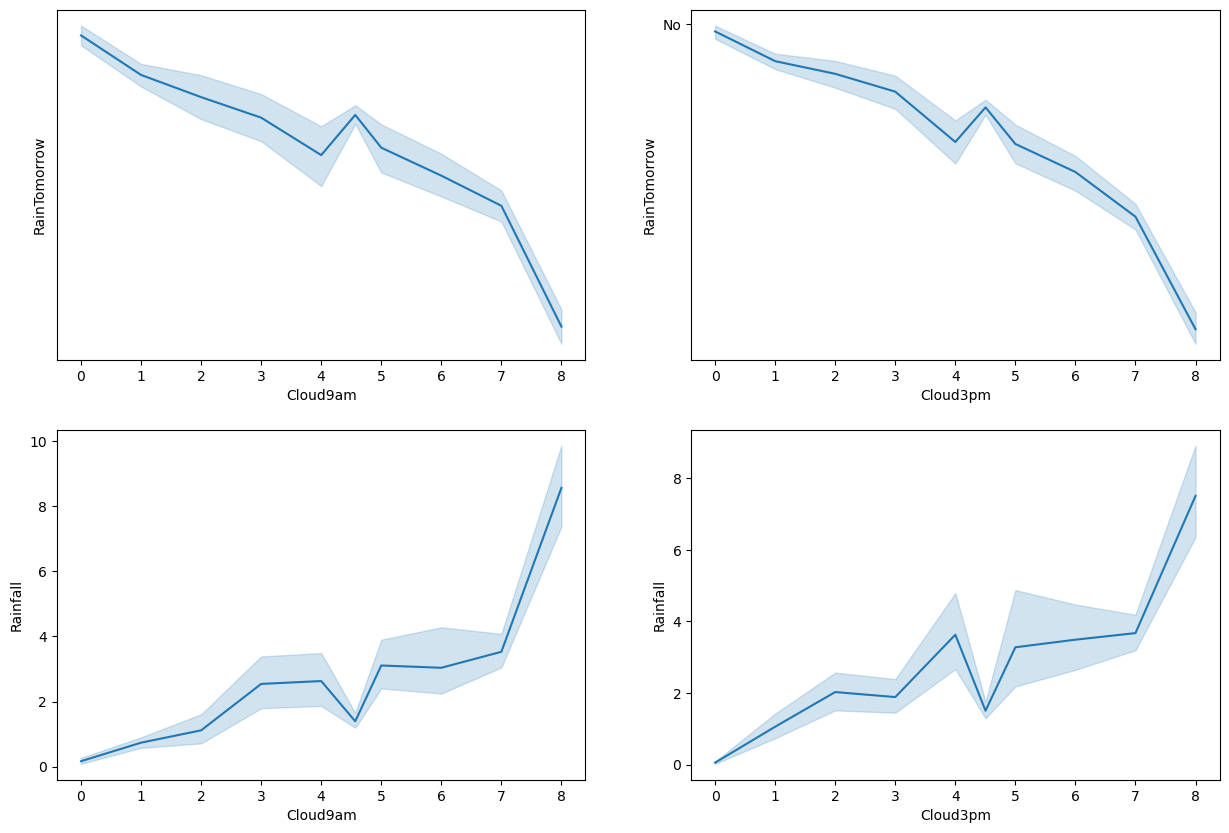

In [39]:
fig,axes=plt.subplots(2,2,figsize=(15,10))

#checking the relation between Cloud9am and RainTomorrow
sns.lineplot(x='Cloud9am',y='RainTomorrow',ax=axes[0,0],palette="OrRd",data=df)

#checking the relation between Cloud3pm and RainTomorrow
sns.lineplot(x='Cloud3pm',y='RainTomorrow',ax=axes[0,1],palette="OrRd",data=df)

#checking the relation between Cloud9am and Rainfall
sns.lineplot(x='Cloud9am',y='Rainfall',ax=axes[1,0],palette="OrRd",data=df)

#checking the relation between Cloud3pm and Rainfall
sns.lineplot(x='Cloud3pm',y='Rainfall',ax=axes[1,1],palette="OrRd",data=df)

Findings--
1.The graph shows a linear relationship, and inverse relationship between cloud9am and cloud3pm and rain tomorrow 
2.There is a  positive relationship between cloud9am and cloud3pm and rainfall.

<AxesSubplot:xlabel='Temp3pm', ylabel='Rainfall'>

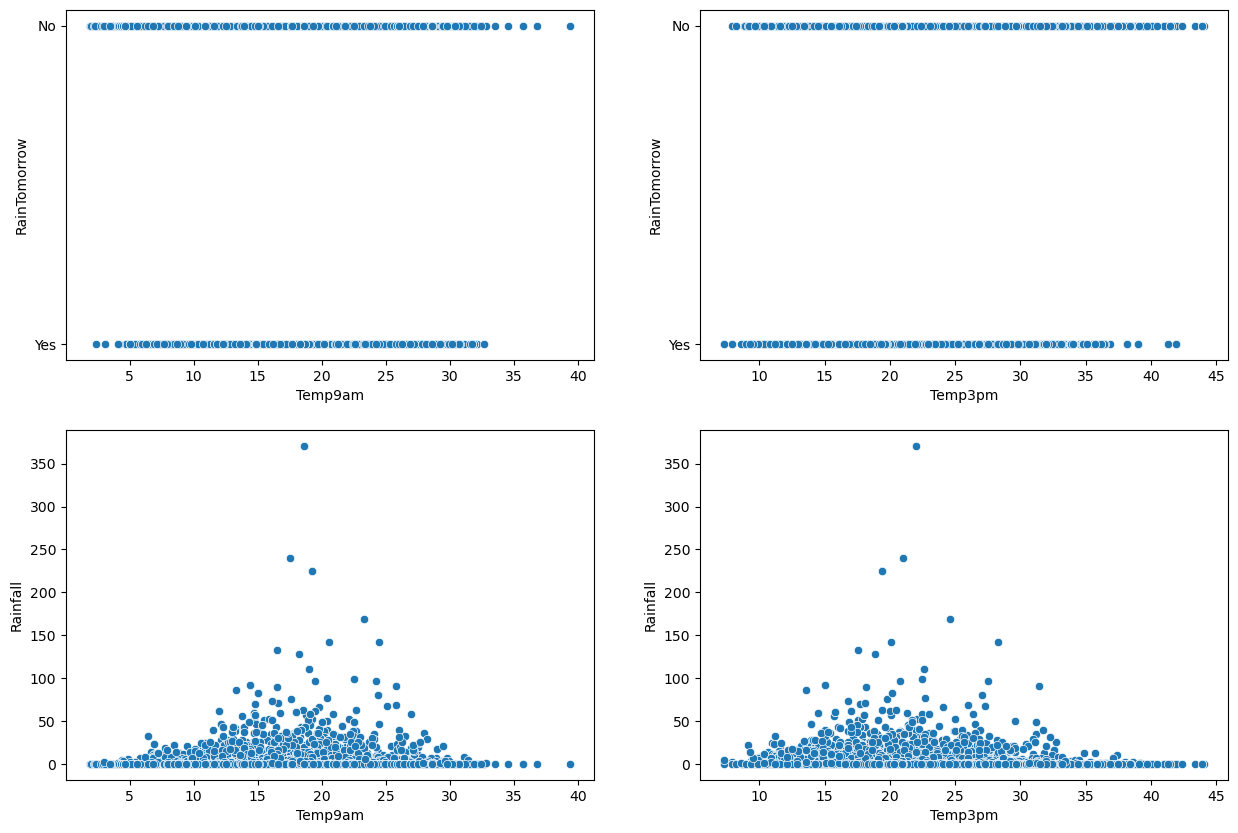

In [40]:
fig,axes=plt.subplots(2,2,figsize=(15,10))

#checking the relation between Temp9am and RainTomorrow
sns.scatterplot(x='Temp9am',y='RainTomorrow',ax=axes[0,0],palette="OrRd",data=df)

#checking the relation between Temp3pm and RainTomorrow
sns.scatterplot(x='Temp3pm',y='RainTomorrow',ax=axes[0,1],palette="OrRd",data=df)

#checking the relation between Temp9am and Rainfall
sns.scatterplot(x='Temp9am',y='Rainfall',ax=axes[1,0],palette="OrRd",data=df)

#checking the relation between Temp3pm and Rainfall
sns.scatterplot(x='Temp3pm',y='Rainfall',ax=axes[1,1],palette="OrRd",data=df)

Findings--No linear relation is seen in the above plots.

<AxesSubplot:xlabel='Year', ylabel='Rainfall'>

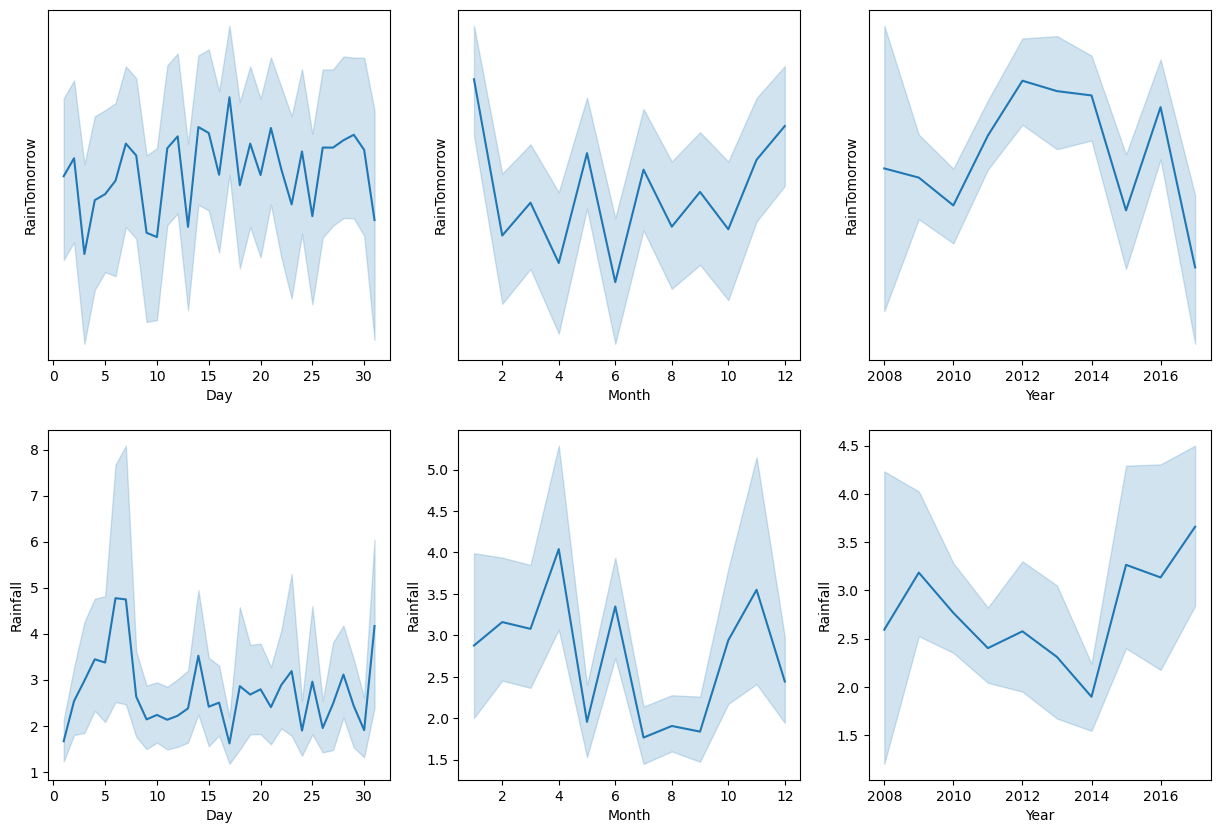

In [41]:
fig,axes=plt.subplots(2,3,figsize=(15,10))

#checking the relation between Day and RainTomorrow
sns.lineplot(x='Day',y='RainTomorrow',ax=axes[0,0],palette="green",data=df)

#checking the relation between Month and RainTomorrow
sns.lineplot(x='Month',y='RainTomorrow',ax=axes[0,1],palette="green",data=df)

#checking the relation between Year and RainTomorrow
sns.lineplot(x='Year',y='RainTomorrow',ax=axes[0,2],palette="green",data=df)

#checking the relation between Day and Rainfall
sns.lineplot(x='Day',y='Rainfall',ax=axes[1,0],palette="purple",data=df)

#checking the relation between Month and Rainfall
sns.lineplot(x='Month',y='Rainfall',ax=axes[1,1],palette="purple",data=df)

#checking the relation between Year and Rainfall
sns.lineplot(x='Year',y='Rainfall',ax=axes[1,2],palette="purple",data=df)

Findings--It can be clearly seen in the graph that there is no linear relationship.

Identifying the Outliers

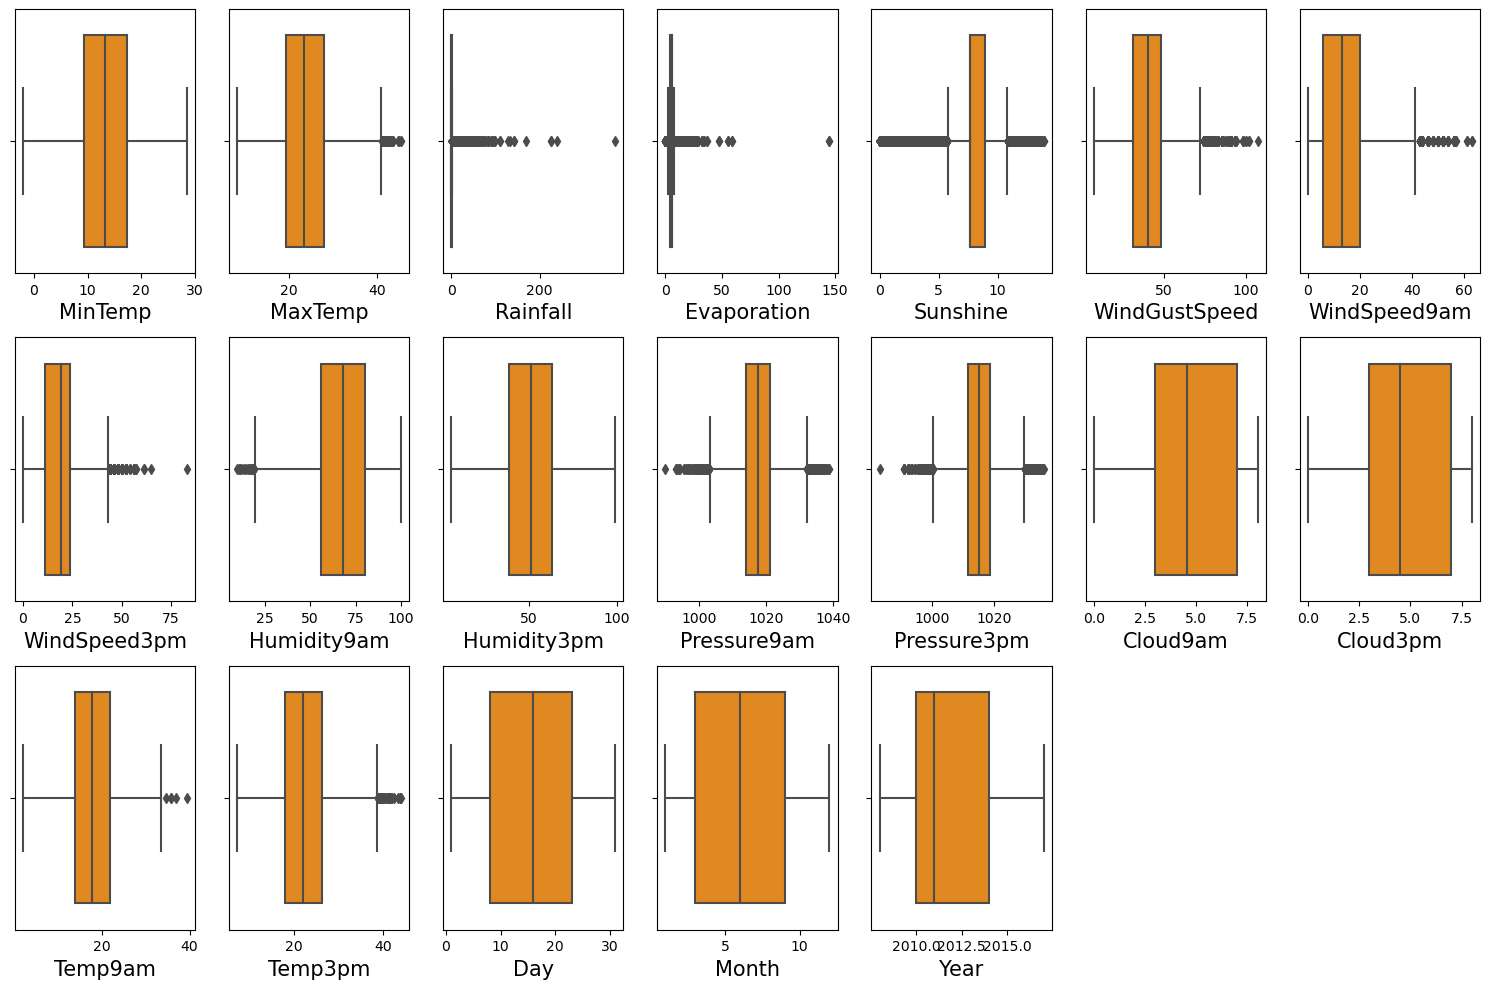

In [42]:
# Identifying the outliers using boxplot
plt.figure(figsize=(15,10),facecolor='white')
plotnumber=1
for column in num_col:
    if plotnumber<=20:
        ax=plt.subplot(3,7,plotnumber)
        sns.boxplot(df[column],color="darkorange")
        plt.xlabel(column,fontsize=15)
    plotnumber+=1
plt.tight_layout()

Findings--The features having outliers are: MaxTemp, Rainfall, Evaporation, Sunshine, WindGustSpeed, WindSpeed9am, Windspeed3pm, Humidity9am, Pressure9am, Pressure3pm, Temp9am, Temp3pm.

In [43]:
df.columns

Index(['Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow', 'Day', 'Month', 'Year'],
      dtype='object')

Removing Outliers----> By Z Score method

In [44]:
feature = df[['MaxTemp','Rainfall','Evaporation','Sunshine','WindGustSpeed','WindSpeed9am','WindSpeed3pm','Humidity9am','Pressure9am','Pressure3pm','Temp9am','Temp3pm']]

z=np.abs(zscore(feature))

z

,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Pressure9am,Pressure3pm,Temp9am,Temp3pm
0,1.570089e-01,0.206021,2.305893e-16,1.257472e-15,0.277710,0.607461,0.563297,0.189439,1.584003,1.308665,0.153712,0.108138
1,2.028121e-01,0.264165,2.305893e-16,1.257472e-15,0.277710,0.972321,0.357200,1.420268,1.121880,1.196072,0.100217,0.312348
2,3.009450e-01,0.264165,2.305893e-16,1.257472e-15,0.422897,0.508725,0.769394,1.777981,1.599939,1.051309,0.577390,0.127334
3,6.771214e-01,0.264165,2.305893e-16,1.257472e-15,1.174166,0.281166,0.982428,1.360650,0.006411,0.391836,0.060269,0.682376
4,1.380408e+00,0.167258,2.305893e-16,1.257472e-15,0.059928,0.676112,0.151104,0.845246,1.090010,1.485596,0.006773,1.220599
...,...,...,...,...,...,...,...,...,...,...,...,...
8420,7.523137e-02,0.264165,2.305893e-16,1.257472e-15,0.666009,0.083694,0.776331,1.002937,1.109058,0.814518,1.366273,0.007221
8421,2.355231e-01,0.264165,2.305893e-16,1.257472e-15,1.319354,0.083694,0.982428,0.704843,0.933770,0.621501,1.223619,0.345987
8422,4.972110e-01,0.264165,2.305893e-16,1.257472e-15,0.230447,0.478639,0.982428,0.883699,0.535388,0.251553,0.938310,0.615099
8423,5.135665e-01,0.264165,2.305893e-16,1.257472e-15,0.883791,0.083694,1.188525,1.002937,0.280424,0.203299,0.474684,0.598279


In [45]:
# Creating new dataframe
new_df = df[(z<3).all(axis=1)] 
new_df

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Day,Month,Year
0,Albury,13.4,22.900000,0.6,5.389395,7.632205,W,44.000000,W,WNW,...,1007.1,8.000000,4.503183,16.9,21.8,No,No,1,12,2008
1,Albury,7.4,25.100000,0.0,5.389395,7.632205,WNW,44.000000,NNW,WSW,...,1007.8,4.566622,4.503183,17.2,24.3,No,No,2,12,2008
2,Albury,12.9,25.700000,0.0,5.389395,7.632205,WSW,46.000000,W,WSW,...,1008.7,4.566622,2.000000,21.0,23.2,No,No,3,12,2008
3,Albury,9.2,28.000000,0.0,5.389395,7.632205,NE,24.000000,SE,E,...,1012.8,4.566622,4.503183,18.1,26.5,No,No,4,12,2008
4,Albury,17.5,32.300000,1.0,5.389395,7.632205,W,41.000000,ENE,NW,...,1006.0,7.000000,8.000000,17.8,29.7,No,No,5,12,2008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8420,Uluru,2.8,23.400000,0.0,5.389395,7.632205,E,31.000000,SE,ENE,...,1020.3,4.566622,4.503183,10.1,22.4,No,No,21,6,2017
8421,Uluru,3.6,25.300000,0.0,5.389395,7.632205,NNW,22.000000,SE,N,...,1019.1,4.566622,4.503183,10.9,24.5,No,No,22,6,2017
8422,Uluru,5.4,26.900000,0.0,5.389395,7.632205,N,37.000000,SE,WNW,...,1016.8,4.566622,4.503183,12.5,26.1,No,No,23,6,2017
8423,Uluru,7.8,27.000000,0.0,5.389395,7.632205,SE,28.000000,SSE,N,...,1016.5,3.000000,2.000000,15.1,26.0,No,No,24,6,2017


In [46]:
df.shape

(8425, 25)

In [47]:
new_df.shape

(7987, 25)

New dataframe after removing the outliers. 

In [48]:
# Checking Percentage of data loss
loss_percent=(8425-7987)/8425*100
print(loss_percent,'%')

5.198813056379822 %


The data loss is less then 10 % which is acceptable

Checking the skewness of the dataset

In [49]:
new_df.skew().sort_values()

Sunshine        -0.723970
Cloud9am        -0.356892
Cloud3pm        -0.266829
Humidity9am     -0.231656
MinTemp         -0.084549
Temp9am         -0.038035
Day              0.002731
Pressure9am      0.020735
Pressure3pm      0.044876
Month            0.054460
Humidity3pm      0.125150
WindSpeed3pm     0.300109
MaxTemp          0.314510
Temp3pm          0.334170
Year             0.430100
WindGustSpeed    0.506897
WindSpeed9am     0.711395
Evaporation      0.846181
Rainfall         3.519090
dtype: float64

Sunshine, Rainfall, Evaporation, Windspeed9am, Windgustspeed has skewness.

Removing skewness---> By log transformation method

In [50]:
# We only applied the log transformation on Rainfall and Evaporation
new_df["Rainfall"] = np.log1p(new_df["Rainfall"])
new_df["Evaporation"] = np.log1p(new_df["Evaporation"])

In [51]:
#checking skewness again
new_df.skew().sort_values()

Evaporation     -0.993594
Sunshine        -0.723970
Cloud9am        -0.356892
Cloud3pm        -0.266829
Humidity9am     -0.231656
MinTemp         -0.084549
Temp9am         -0.038035
Day              0.002731
Pressure9am      0.020735
Pressure3pm      0.044876
Month            0.054460
Humidity3pm      0.125150
WindSpeed3pm     0.300109
MaxTemp          0.314510
Temp3pm          0.334170
Year             0.430100
WindGustSpeed    0.506897
WindSpeed9am     0.711395
Rainfall         1.811941
dtype: float64

In [52]:
# checking for numerical columns
new_df_num_col=[]
for i in new_df.dtypes.index:
    if new_df.dtypes[i]!='object':
        new_df_num_col.append(i)
print(new_df_num_col)

['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'Day', 'Month', 'Year']


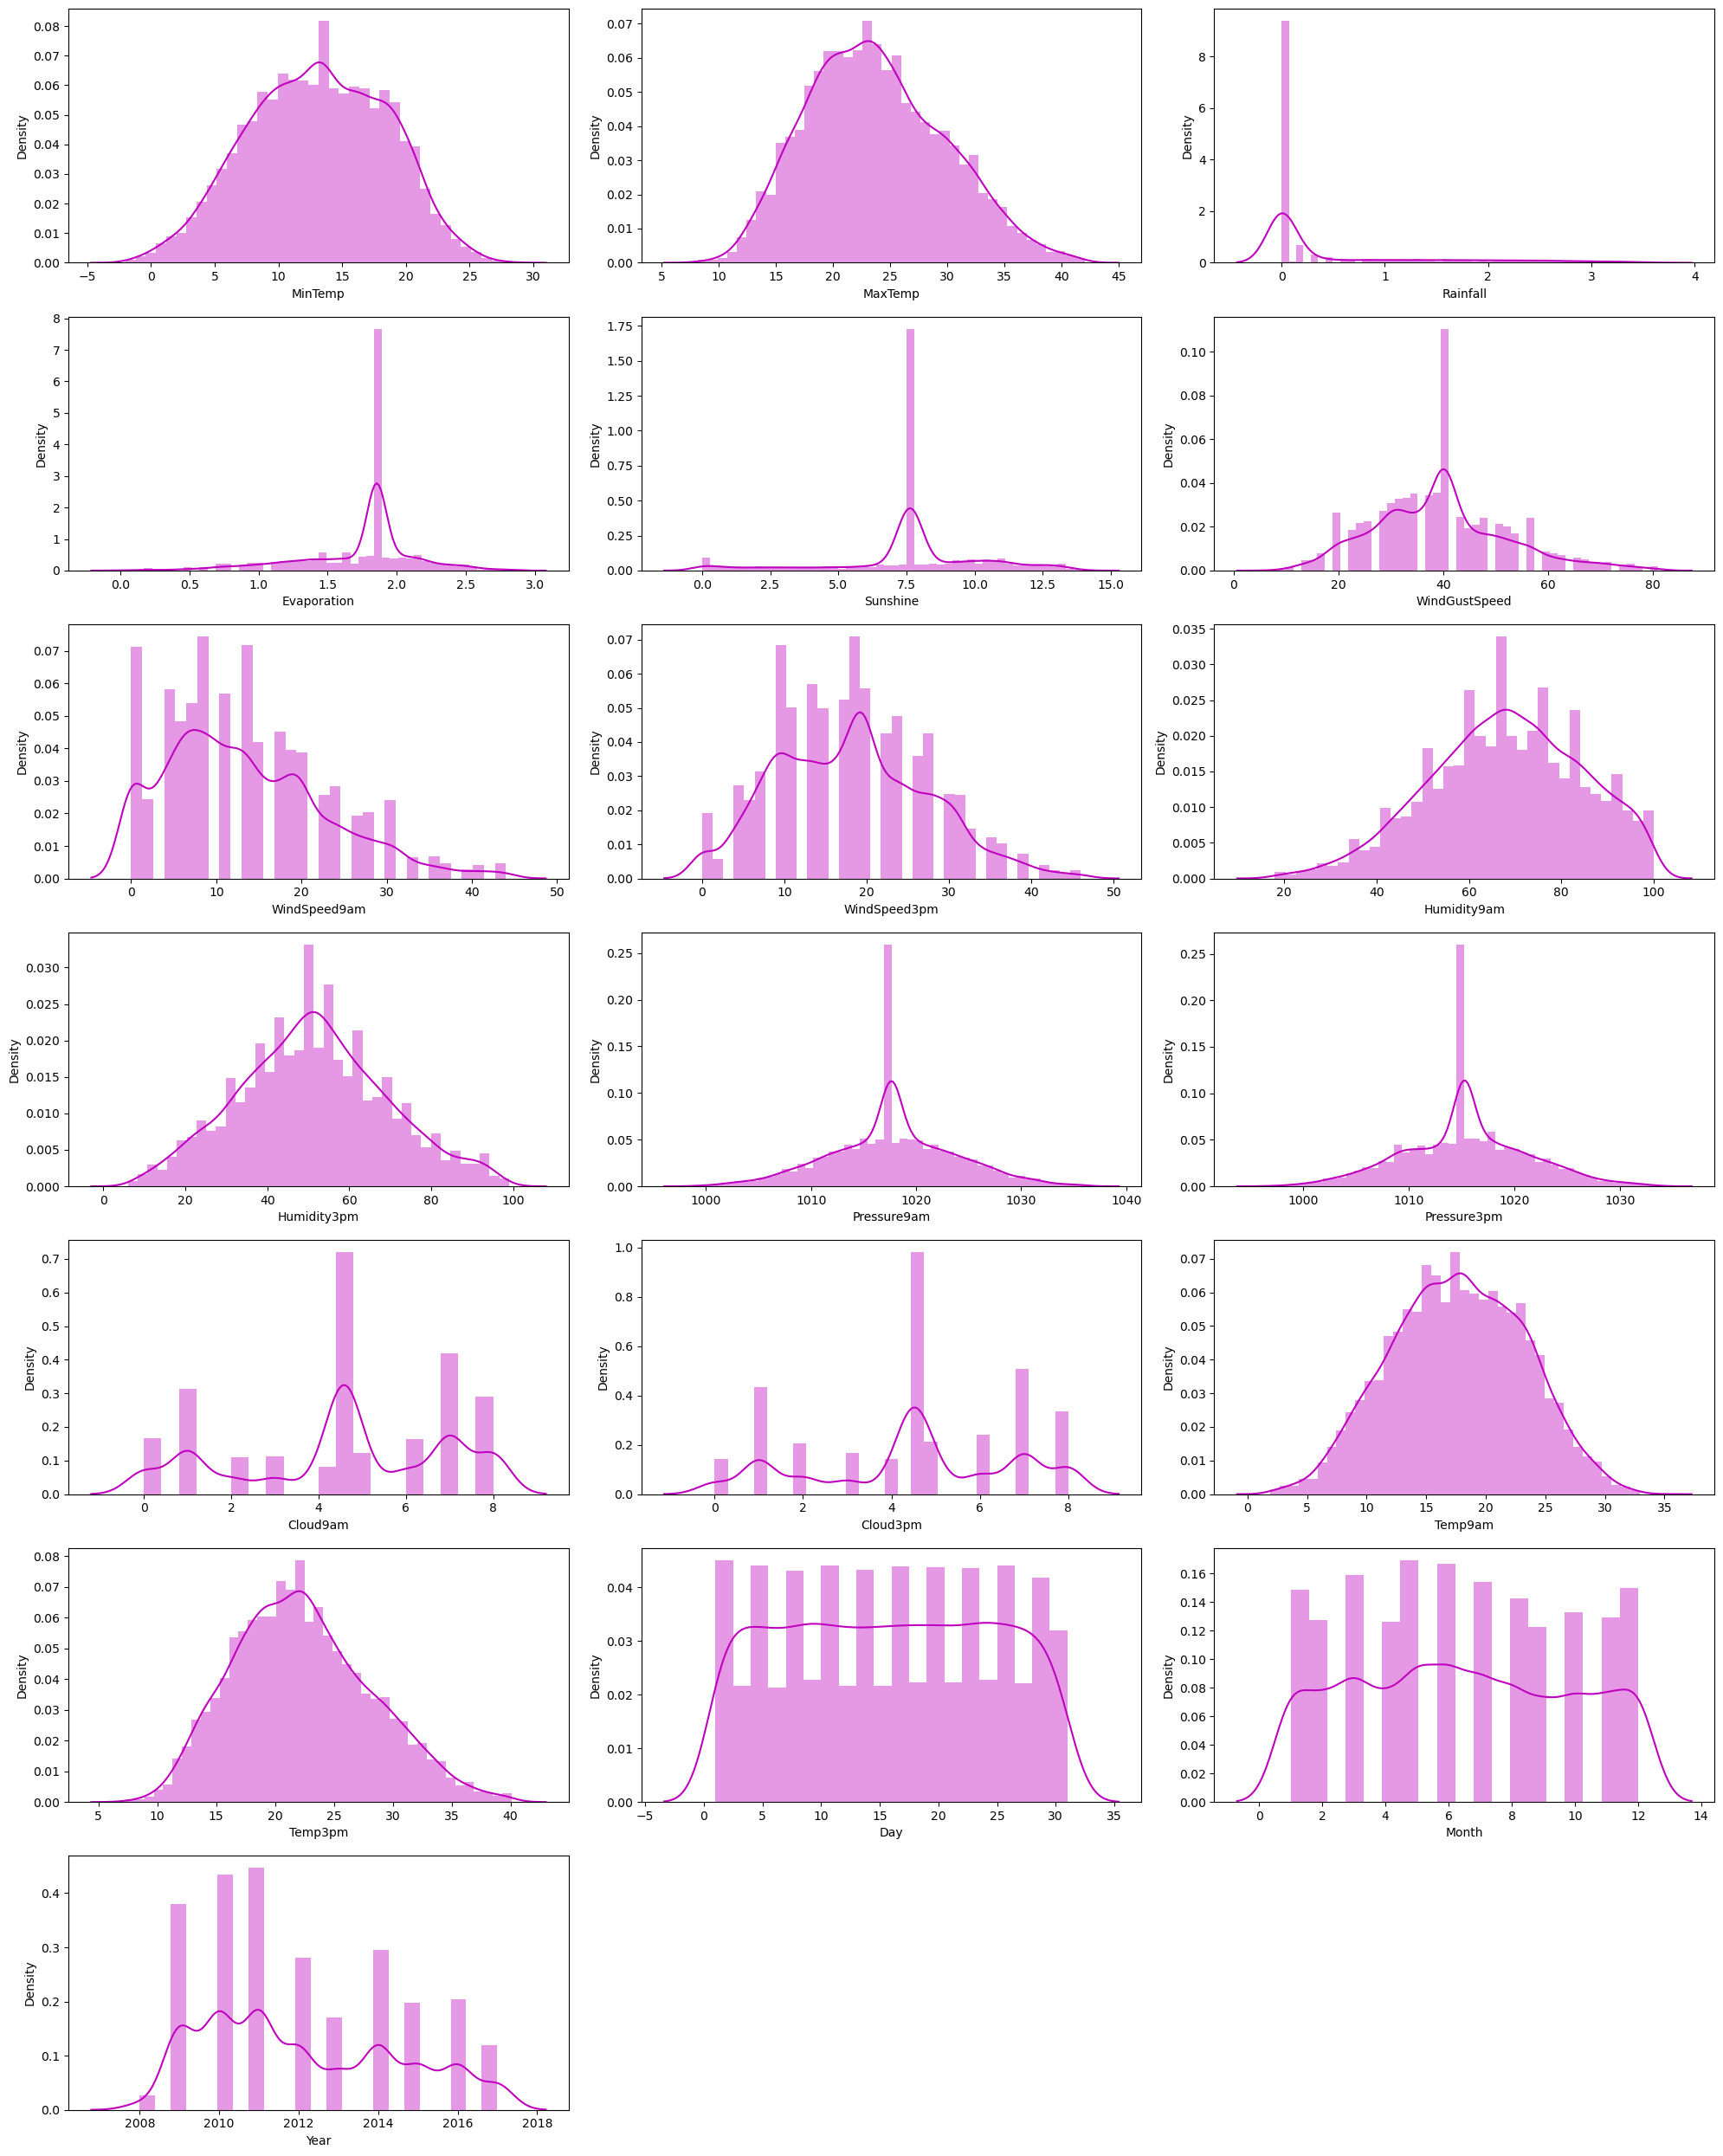

In [53]:
plt.figure(figsize=(20,25),facecolor='white')
plotnumber=1
for column in new_df_num_col:
    if plotnumber<=20:
        ax=plt.subplot(7,3,plotnumber)
        sns.distplot(new_df[column],color="m")
        plt.xlabel(column,fontsize=10)
        plt.yticks(rotation=0,fontsize=10)
    plotnumber+=1
plt.tight_layout()

Findings--The Skewness have successfully reduced

Encoding the categorical columns

In [54]:
le=LabelEncoder()
new_df[cat_col]= new_df[cat_col].apply(le.fit_transform)
new_df

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Day,Month,Year
0,1,13.4,22.900000,0.470004,1.85464,7.632205,13,44.000000,13,14,...,1007.1,8.000000,4.503183,16.9,21.8,0,0,1,12,2008
1,1,7.4,25.100000,0.000000,1.85464,7.632205,14,44.000000,6,15,...,1007.8,4.566622,4.503183,17.2,24.3,0,0,2,12,2008
2,1,12.9,25.700000,0.000000,1.85464,7.632205,15,46.000000,13,15,...,1008.7,4.566622,2.000000,21.0,23.2,0,0,3,12,2008
3,1,9.2,28.000000,0.000000,1.85464,7.632205,4,24.000000,9,0,...,1012.8,4.566622,4.503183,18.1,26.5,0,0,4,12,2008
4,1,17.5,32.300000,0.693147,1.85464,7.632205,13,41.000000,1,7,...,1006.0,7.000000,8.000000,17.8,29.7,0,0,5,12,2008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8420,9,2.8,23.400000,0.000000,1.85464,7.632205,0,31.000000,9,1,...,1020.3,4.566622,4.503183,10.1,22.4,0,0,21,6,2017
8421,9,3.6,25.300000,0.000000,1.85464,7.632205,6,22.000000,9,3,...,1019.1,4.566622,4.503183,10.9,24.5,0,0,22,6,2017
8422,9,5.4,26.900000,0.000000,1.85464,7.632205,3,37.000000,9,14,...,1016.8,4.566622,4.503183,12.5,26.1,0,0,23,6,2017
8423,9,7.8,27.000000,0.000000,1.85464,7.632205,9,28.000000,10,3,...,1016.5,3.000000,2.000000,15.1,26.0,0,0,24,6,2017


Converted the categorical columns into numerical columns using label encoding method

Checking the correlation 

In [55]:
cor =new_df.corr()
cor

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Day,Month,Year
Location,1.000000,0.116694,0.063798,0.013354,0.123801,0.048579,-0.037707,0.245658,-0.041030,-0.031195,...,-0.012288,0.041859,0.027050,0.118100,0.060707,0.002934,0.009222,-0.004978,-0.086011,0.481143
MinTemp,0.116694,1.000000,0.718598,0.080984,0.355551,0.065682,-0.154935,0.231097,-0.045231,-0.154184,...,-0.427936,0.089354,0.036649,0.888690,0.687570,0.061728,0.091021,0.010924,-0.247066,0.040001
MaxTemp,0.063798,0.718598,1.000000,-0.206494,0.458312,0.387050,-0.237955,0.136337,-0.217160,-0.190417,...,-0.414358,-0.252579,-0.248268,0.864864,0.974957,-0.219747,-0.149708,0.017068,-0.164351,0.120204
Rainfall,0.013354,0.080984,-0.206494,1.000000,-0.151081,-0.221148,0.116389,0.089126,0.148138,0.103933,...,-0.034828,0.278194,0.240747,-0.076736,-0.215864,0.902769,0.317142,-0.016476,-0.005666,0.002860
Evaporation,0.123801,0.355551,0.458312,-0.151081,1.000000,0.385395,-0.116103,0.155495,-0.096182,-0.039583,...,-0.269095,-0.101440,-0.137281,0.424506,0.446336,-0.166170,-0.087821,0.009767,-0.047647,0.148225
Sunshine,0.048579,0.065682,0.387050,-0.221148,0.385395,1.000000,-0.104739,0.009797,-0.076595,-0.069789,...,-0.063832,-0.527350,-0.541996,0.261680,0.403489,-0.219089,-0.317675,0.003451,-0.000727,0.054960
WindGustDir,-0.037707,-0.154935,-0.237955,0.116389,-0.116103,-0.104739,1.000000,0.005465,0.405681,0.507292,...,-0.008263,0.123415,0.093527,-0.185080,-0.249791,0.121709,0.044378,0.017003,0.038044,-0.096042
WindGustSpeed,0.245658,0.231097,0.136337,0.089126,0.155495,0.009797,0.005465,1.000000,-0.069460,0.076737,...,-0.336132,0.013678,0.064375,0.198936,0.101786,0.076677,0.181478,-0.005232,0.045638,-0.035546
WindDir9am,-0.041030,-0.045231,-0.217160,0.148138,-0.096182,-0.076595,0.405681,-0.069460,1.000000,0.243622,...,0.081400,0.092396,0.062637,-0.101576,-0.224390,0.149239,0.027091,-0.010014,0.018344,-0.034468
WindDir3pm,-0.031195,-0.154184,-0.190417,0.103933,-0.039583,-0.069789,0.507292,0.076737,0.243622,1.000000,...,-0.037280,0.073742,0.054321,-0.172000,-0.202000,0.100983,0.003674,-0.000714,0.028629,-0.010781


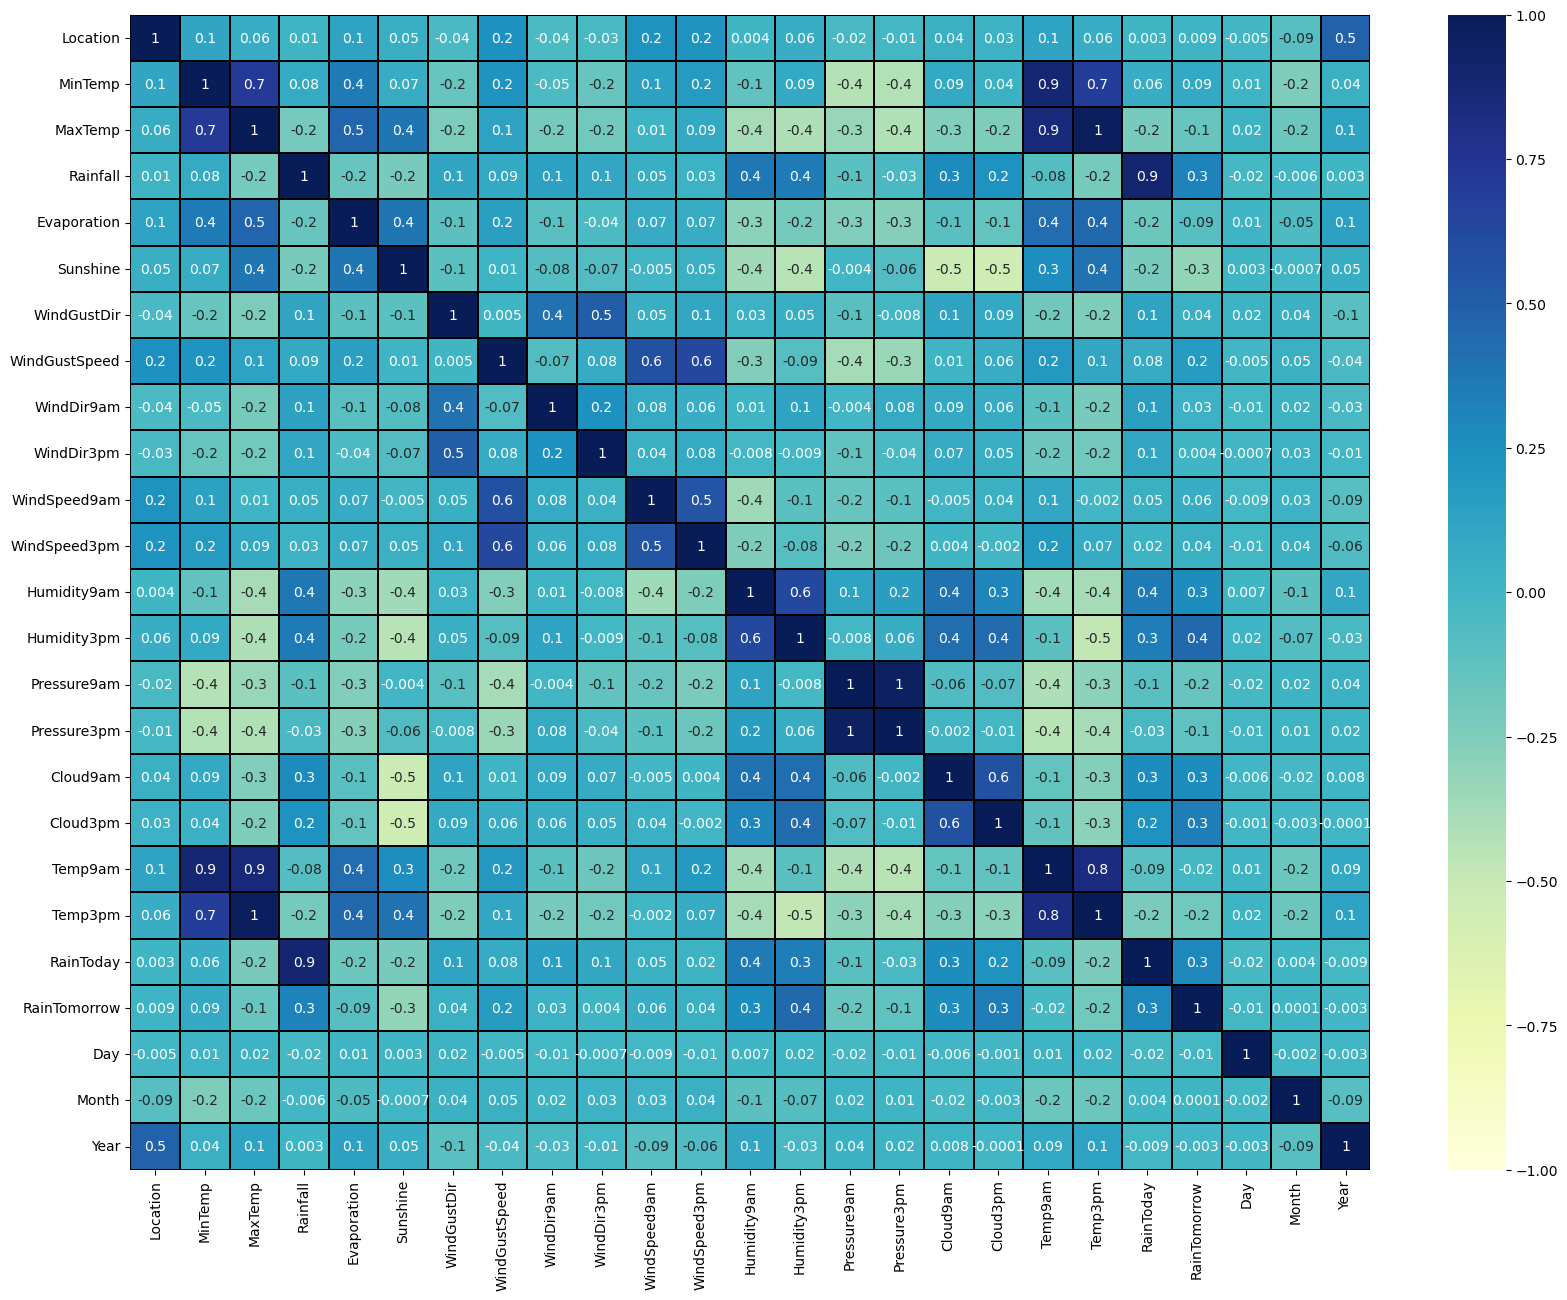

In [56]:
plt.figure(figsize=(20,15))    
sns.heatmap(new_df.corr(),linewidths=.1,vmin=-1, vmax=1,fmt='.1g',linecolor="black",annot=True,annot_kws={'size':10},cmap="YlGnBu")
plt.yticks(rotation=0);

In [57]:
cor['RainTomorrow'].sort_values(ascending=False)

RainTomorrow     1.000000
Humidity3pm      0.445891
Cloud3pm         0.337922
Rainfall         0.317142
RainToday        0.294528
Humidity9am      0.269722
Cloud9am         0.269598
WindGustSpeed    0.181478
MinTemp          0.091021
WindSpeed9am     0.057933
WindGustDir      0.044378
WindSpeed3pm     0.042472
WindDir9am       0.027091
Location         0.009222
WindDir3pm       0.003674
Month            0.000135
Year            -0.003180
Day             -0.012493
Temp9am         -0.021459
Evaporation     -0.087821
Pressure3pm     -0.124953
MaxTemp         -0.149708
Pressure9am     -0.152692
Temp3pm         -0.191706
Sunshine        -0.317675
Name: RainTomorrow, dtype: float64

Humidy has the highest correlation with RainTomorrow and sun shine has the lowest correlation.

In [58]:
cor['Rainfall'].sort_values(ascending=False)

Rainfall         1.000000
RainToday        0.902769
Humidity9am      0.374141
Humidity3pm      0.357797
RainTomorrow     0.317142
Cloud9am         0.278194
Cloud3pm         0.240747
WindDir9am       0.148138
WindGustDir      0.116389
WindDir3pm       0.103933
WindGustSpeed    0.089126
MinTemp          0.080984
WindSpeed9am     0.048200
WindSpeed3pm     0.026797
Location         0.013354
Year             0.002860
Month           -0.005666
Day             -0.016476
Pressure3pm     -0.034828
Temp9am         -0.076736
Pressure9am     -0.108548
Evaporation     -0.151081
MaxTemp         -0.206494
Temp3pm         -0.215864
Sunshine        -0.221148
Name: Rainfall, dtype: float64

RainToday has highest relation with Rainfall and sunshine has least correlation with Rainfall.

Visualizing the correlation between label and features using bar plot

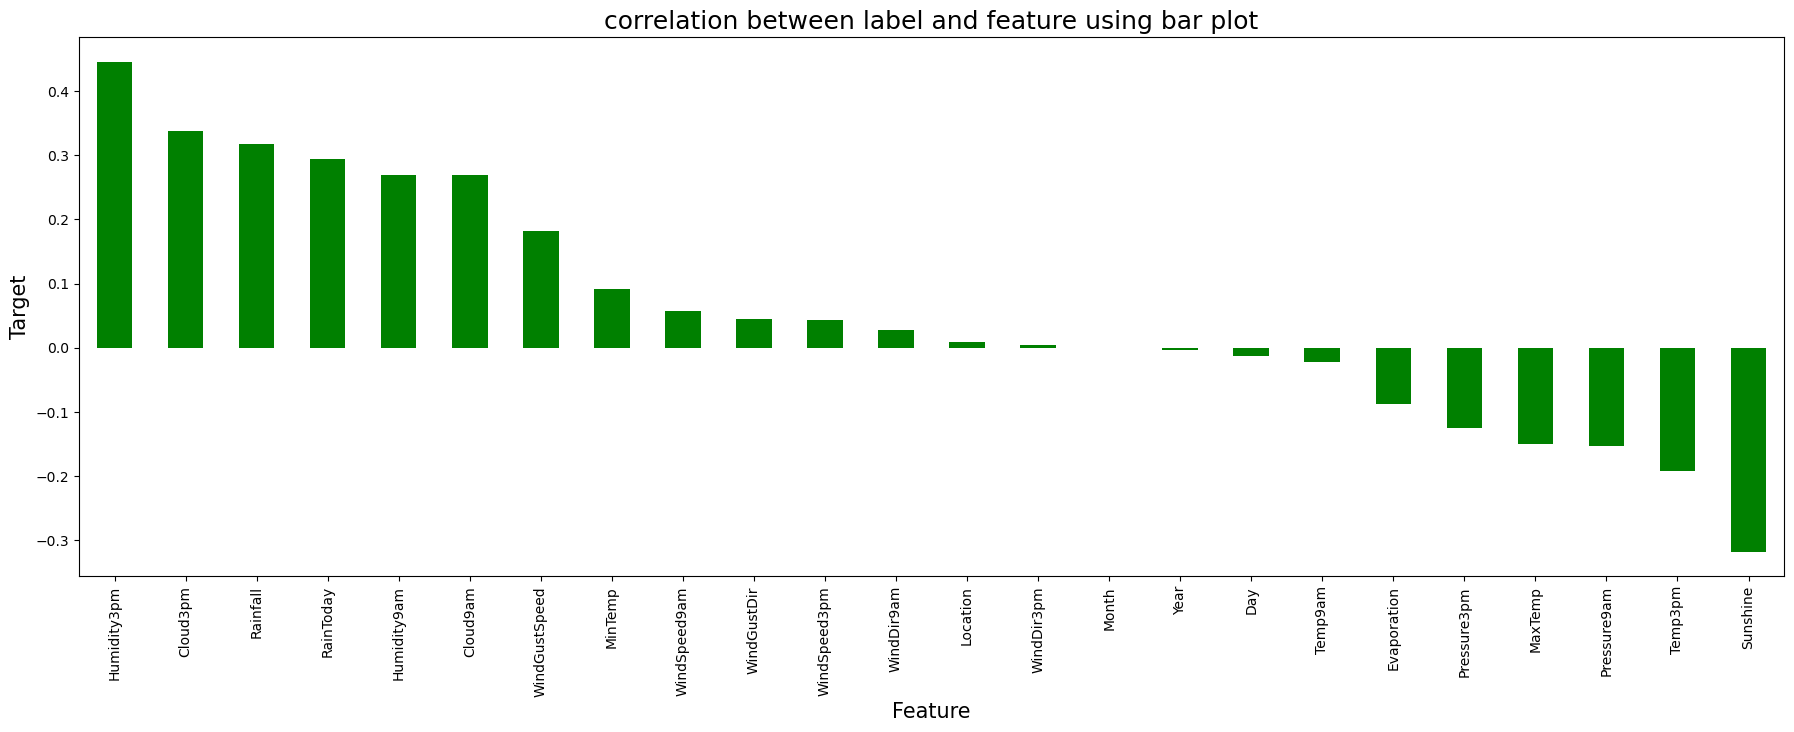

In [59]:
plt.figure(figsize=(22,7))
new_df.corr()['RainTomorrow'].sort_values(ascending=False).drop(['RainTomorrow']).plot(kind='bar',color='g')
plt.xlabel('Feature',fontsize=15)
plt.ylabel('Target',fontsize=15)
plt.title('correlation between label and feature using bar plot',fontsize=18)
plt.show()

Findings---The plot shows correlation between label and feature .

# (1) Prediction for Rain-Tomorrow

Splitting feature and label into x and y

In [60]:
x = new_df.drop("RainTomorrow", axis=1)
y = new_df["RainTomorrow"]

Feature Scaling using Standard Scaler

In [61]:
scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)
x

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,Day,Month,Year
0,-1.508427,0.056444,-0.145732,-0.001029,0.2832,-0.013374,1.229267,0.364103,1.250245,1.400214,...,-1.687142,-1.398115,1.425345,0.013138,-0.138099,-0.098593,-0.542476,-1.671657,1.634113,-1.661315
1,-1.508427,-1.058476,0.220676,-0.543392,0.2832,-0.013374,1.441960,0.364103,-0.277857,1.626597,...,-1.202435,-1.279988,0.011773,0.013138,-0.084254,0.329747,-0.542476,-1.557976,1.634113,-1.661315
2,-1.508427,-0.036466,0.320605,-0.543392,0.2832,-0.013374,1.654654,0.520531,1.250245,1.626597,...,-1.703856,-1.128109,0.011773,-1.076661,0.597788,0.141277,-0.542476,-1.444296,1.634113,-1.661315
3,-1.508427,-0.724000,0.703668,-0.543392,0.2832,-0.013374,-0.684977,-1.200173,0.377044,-1.769138,...,-0.032451,-0.436219,0.011773,0.013138,0.077282,0.706687,-0.542476,-1.330616,1.634113,-1.661315
4,-1.508427,0.818306,1.419829,0.256468,0.2832,-0.013374,1.229267,0.129462,-1.369358,-0.184462,...,-1.169007,-1.583744,1.013630,1.535531,0.023437,1.254963,-0.542476,-1.216936,1.634113,-1.661315
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7982,1.029423,-1.913248,-0.062457,-0.543392,0.2832,-0.013374,-1.535751,-0.652677,0.377044,-1.542755,...,1.137532,0.829435,0.011773,0.013138,-1.358595,0.004208,-0.542476,0.601949,-0.123726,2.004134
7983,1.029423,-1.764592,0.253986,-0.543392,0.2832,-0.013374,-0.259589,-1.356601,0.377044,-1.089991,...,0.953678,0.626930,0.011773,0.013138,-1.215007,0.364014,-0.542476,0.715629,-0.123726,2.004134
7984,1.029423,-1.430116,0.520464,-0.543392,0.2832,-0.013374,-0.897670,-0.183394,0.377044,1.400214,...,0.535827,0.238796,0.011773,0.013138,-0.927832,0.638152,-0.542476,0.829310,-0.123726,2.004134
7985,1.029423,-0.984148,0.537119,-0.543392,0.2832,-0.013374,0.378492,-0.887318,0.595344,-1.089991,...,0.268402,0.188170,-0.633229,-1.076661,-0.461172,0.621019,-0.542476,0.942990,-0.123726,2.004134


Checking Multicollinearity

In [62]:
# Finding varience inflation factor in each scaled column
def calc_vif(x):
    vif = pd.DataFrame()
    vif["Features"] = x.columns
    vif["VIF values"] = [variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
    return(vif)

In [63]:
calc_vif(x)

,Features,VIF values
0,Location,1.571653
1,MinTemp,8.789522
2,MaxTemp,26.417899
3,Rainfall,5.628777
4,Evaporation,1.532017
5,Sunshine,1.983348
6,WindGustDir,1.615549
7,WindGustSpeed,2.319419
8,WindDir9am,1.348963
9,WindDir3pm,1.484001


There is high multicolinearity in features: MaxTemp, Pressure9am, Pressure3pm, Temp9am, Temp3pm.

"Temp3pm", "Pressure9am" and "Temp9am" have negative correlations with "RainTomorrow" and at the same time high VIF valueso have to dropped those columns.

In [64]:
# Dropping Temp3pm column
x.drop("Temp3pm",axis=1,inplace=True)

In [65]:
calc_vif(x)

,Features,VIF values
0,Location,1.570986
1,MinTemp,8.753259
2,MaxTemp,9.631414
3,Rainfall,5.625805
4,Evaporation,1.530223
5,Sunshine,1.983149
6,WindGustDir,1.612378
7,WindGustSpeed,2.307151
8,WindDir9am,1.347905
9,WindDir3pm,1.482953


In [66]:
# Dropping Pressure9am column
x.drop("Pressure9am",axis=1,inplace=True)

In [67]:
calc_vif(x)

,Features,VIF values
0,Location,1.570985
1,MinTemp,8.634145
2,MaxTemp,9.238668
3,Rainfall,5.614540
4,Evaporation,1.513642
5,Sunshine,1.977987
6,WindGustDir,1.598359
7,WindGustSpeed,2.289769
8,WindDir9am,1.327899
9,WindDir3pm,1.412314


In [68]:
# Dropping Temp9am column
x.drop("Temp9am",axis=1,inplace=True)

In [69]:
calc_vif(x)

,Features,VIF values
0,Location,1.568607
1,MinTemp,4.489769
2,MaxTemp,5.496337
3,Rainfall,5.602864
4,Evaporation,1.509171
5,Sunshine,1.970041
6,WindGustDir,1.596704
7,WindGustSpeed,2.253248
8,WindDir9am,1.327891
9,WindDir3pm,1.411852


No multi-collinearity in the data.

Using SMOTE

In [70]:
y.value_counts()

0    6165
1    1822
Name: RainTomorrow, dtype: int64

In [71]:
from imblearn.over_sampling import SMOTE
SM = SMOTE()
x, y = SM.fit_resample(x,y)

In [72]:
y.value_counts()

0    6165
1    6165
Name: RainTomorrow, dtype: int64

The data is balanced now.

Machine Learning

Finding best random state

In [73]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
rf = RandomForestClassifier()

In [74]:
#For Test size .30
maxAccu=0
maxRS=0

for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.30, random_state =i)
    rf.fit(x_train, y_train)
    pred = rf.predict(x_test)
    acc=accuracy_score(y_test, pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy is ",maxAccu," on Random_state ",maxRS)

Best accuracy is  0.9421465260881319  on Random_state  112


In [75]:
#For Test size .20
maxAccu=0
maxRS=0

for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.20, random_state =i)
    rf.fit(x_train, y_train)
    pred = rf.predict(x_test)
    acc=accuracy_score(y_test, pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy is ",maxAccu," on Random_state ",maxRS)

Best accuracy is  0.9517437145174371  on Random_state  9


We have got the best random state as 153 for test size 0.20

Feature Importance

,Importance
Features,
Humidity3pm,0.148
Cloud3pm,0.103
Rainfall,0.068
Humidity9am,0.062
WindGustSpeed,0.056
Sunshine,0.051
Pressure3pm,0.047
Cloud9am,0.044
MinTemp,0.040


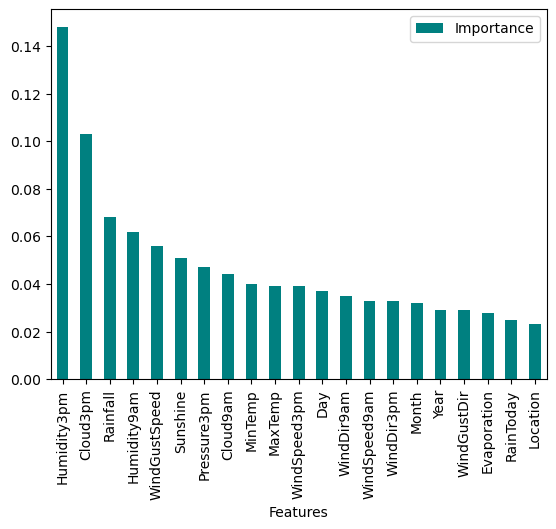

In [76]:
# Lets ckeck the feature importance using Random Forest Regressor

rf.fit(x_train, y_train)
importances = pd.DataFrame({'Features':x.columns, 'Importance':np.round(rf.feature_importances_,3)})
importances = importances.sort_values('Importance', ascending=False).set_index('Features')
importances.plot.bar(color='teal')
importances

In [77]:
# Importing required libraries
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [78]:
# creating a function to run all the classifiers

def classifier(model, x, y):
    x_train,x_test,y_train,y_test = train_test_split(x, y, test_size=0.2, random_state=174)
    
    # Training the model
    model.fit(x_train, y_train)
    
    # Predicting y_test
    pred = model.predict(x_test)
    
    # Accuracy Score
    acc_score = (accuracy_score(y_test, pred))*100
    print("Accuracy Score:", acc_score)
    
    # Classification Report
    class_report = classification_report(y_test, pred)
    print("\nClassification Report:\n", class_report)
    
    # Confusion Matrix
    Confusion_Matrix = confusion_matrix(y_test, pred)
    print("Confusion Matrix:\n", Confusion_Matrix)
    
    # Cross Validation Score
    cv_score = (cross_val_score(model, x, y, cv=5).mean())*100
    print("\nCross Validation Score:", cv_score)
    
    # Result of accuracy minus cv scores
    result = acc_score - cv_score
    print("\nAccuracy Score - Cross Validation Score is", result)

Logistic Regression

In [79]:
model = LogisticRegression()
classifier(model, x, y)

Accuracy Score: 77.8183292781833

Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.79      0.79      1272
           1       0.78      0.76      0.77      1194

    accuracy                           0.78      2466
   macro avg       0.78      0.78      0.78      2466
weighted avg       0.78      0.78      0.78      2466

Confusion Matrix:
 [[1010  262]
 [ 285  909]]

Cross Validation Score: 71.75993511759934

Accuracy Score - Cross Validation Score is 6.058394160583958


Naive Bayes

In [80]:
model = GaussianNB()
classifier(model, x, y)

Accuracy Score: 74.16869424168694

Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.76      0.75      1272
           1       0.74      0.72      0.73      1194

    accuracy                           0.74      2466
   macro avg       0.74      0.74      0.74      2466
weighted avg       0.74      0.74      0.74      2466

Confusion Matrix:
 [[967 305]
 [332 862]]

Cross Validation Score: 71.2976480129765

Accuracy Score - Cross Validation Score is 2.8710462287104406


SVC Classifier

In [81]:
model = SVC(kernel='rbf')
classifier(model, x, y)

Accuracy Score: 85.88807785888078

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.84      0.86      1272
           1       0.84      0.88      0.86      1194

    accuracy                           0.86      2466
   macro avg       0.86      0.86      0.86      2466
weighted avg       0.86      0.86      0.86      2466

Confusion Matrix:
 [[1067  205]
 [ 143 1051]]

Cross Validation Score: 74.3390105433901

Accuracy Score - Cross Validation Score is 11.549067315490674


In [82]:
model = SVC(kernel='linear')
classifier(model, x, y)

Accuracy Score: 77.98053527980535

Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.80      0.79      1272
           1       0.78      0.76      0.77      1194

    accuracy                           0.78      2466
   macro avg       0.78      0.78      0.78      2466
weighted avg       0.78      0.78      0.78      2466

Confusion Matrix:
 [[1012  260]
 [ 283  911]]

Cross Validation Score: 71.59772911597729

Accuracy Score - Cross Validation Score is 6.382806163828064


In [83]:
model = SVC(kernel='poly')
classifier(model, x, y)

Accuracy Score: 84.0227088402271

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.86      0.85      1272
           1       0.84      0.82      0.83      1194

    accuracy                           0.84      2466
   macro avg       0.84      0.84      0.84      2466
weighted avg       0.84      0.84      0.84      2466

Confusion Matrix:
 [[1091  181]
 [ 213  981]]

Cross Validation Score: 73.779399837794

Accuracy Score - Cross Validation Score is 10.243309002433094


Decision Tree Classifier

In [84]:
model = DecisionTreeClassifier()
classifier(model, x, y)

Accuracy Score: 87.95620437956204

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.88      0.88      1272
           1       0.87      0.88      0.88      1194

    accuracy                           0.88      2466
   macro avg       0.88      0.88      0.88      2466
weighted avg       0.88      0.88      0.88      2466

Confusion Matrix:
 [[1119  153]
 [ 144 1050]]

Cross Validation Score: 73.58475263584752

Accuracy Score - Cross Validation Score is 14.371451743714516


KNeighbors Classifier

In [85]:
model = KNeighborsClassifier()
classifier(model, x, y)

Accuracy Score: 86.33414436334145

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.77      0.85      1272
           1       0.80      0.97      0.87      1194

    accuracy                           0.86      2466
   macro avg       0.88      0.87      0.86      2466
weighted avg       0.88      0.86      0.86      2466

Confusion Matrix:
 [[ 976  296]
 [  41 1153]]

Cross Validation Score: 73.43876723438768

Accuracy Score - Cross Validation Score is 12.895377128953768


SGD Classifier

In [86]:
model = SGDClassifier()
classifier(model, x, y)

Accuracy Score: 76.48012976480129

Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.75      0.77      1272
           1       0.74      0.78      0.76      1194

    accuracy                           0.76      2466
   macro avg       0.77      0.77      0.76      2466
weighted avg       0.77      0.76      0.76      2466

Confusion Matrix:
 [[951 321]
 [259 935]]

Cross Validation Score: 68.86455798864559

Accuracy Score - Cross Validation Score is 7.615571776155704


Random Forest Classifier

In [87]:
model = RandomForestClassifier()
classifier(model, x, y)

Accuracy Score: 94.76885644768856

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.94      0.95      1272
           1       0.94      0.95      0.95      1194

    accuracy                           0.95      2466
   macro avg       0.95      0.95      0.95      2466
weighted avg       0.95      0.95      0.95      2466

Confusion Matrix:
 [[1202   70]
 [  59 1135]]

Cross Validation Score: 80.23519870235198

Accuracy Score - Cross Validation Score is 14.533657745336583


In [88]:
model = RandomForestClassifier(random_state=174)
classifier(model, x, y)

Accuracy Score: 94.44444444444444

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.95      0.95      1272
           1       0.94      0.94      0.94      1194

    accuracy                           0.94      2466
   macro avg       0.94      0.94      0.94      2466
weighted avg       0.94      0.94      0.94      2466

Confusion Matrix:
 [[1203   69]
 [  68 1126]]

Cross Validation Score: 80.77047850770478

Accuracy Score - Cross Validation Score is 13.673965936739663


ExtraTrees Classifier

In [89]:
model = ExtraTreesClassifier()
classifier(model, x, y)

Accuracy Score: 95.4176804541768

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.94      0.96      1272
           1       0.94      0.97      0.95      1194

    accuracy                           0.95      2466
   macro avg       0.95      0.95      0.95      2466
weighted avg       0.95      0.95      0.95      2466

Confusion Matrix:
 [[1200   72]
 [  41 1153]]

Cross Validation Score: 80.19464720194647

Accuracy Score - Cross Validation Score is 15.223033252230337


In [90]:
model = ExtraTreesClassifier(random_state=174)
classifier(model, x, y)

Accuracy Score: 95.21492295214922

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.94      0.95      1272
           1       0.94      0.96      0.95      1194

    accuracy                           0.95      2466
   macro avg       0.95      0.95      0.95      2466
weighted avg       0.95      0.95      0.95      2466

Confusion Matrix:
 [[1199   73]
 [  45 1149]]

Cross Validation Score: 79.88645579886455

Accuracy Score - Cross Validation Score is 15.328467153284677


AdaBoost Classifier

In [91]:
model = AdaBoostClassifier()
classifier(model, x, y)

Accuracy Score: 82.40064882400648

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.82      0.83      1272
           1       0.81      0.83      0.82      1194

    accuracy                           0.82      2466
   macro avg       0.82      0.82      0.82      2466
weighted avg       0.82      0.82      0.82      2466

Confusion Matrix:
 [[1042  230]
 [ 204  990]]

Cross Validation Score: 68.41849148418491

Accuracy Score - Cross Validation Score is 13.982157339821569


Gradient Boosting Classifier

In [92]:
model = GradientBoostingClassifier()
classifier(model, x, y)

Accuracy Score: 86.45579886455799

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.86      0.87      1272
           1       0.86      0.87      0.86      1194

    accuracy                           0.86      2466
   macro avg       0.86      0.86      0.86      2466
weighted avg       0.86      0.86      0.86      2466

Confusion Matrix:
 [[1099  173]
 [ 161 1033]]

Cross Validation Score: 66.64233576642336

Accuracy Score - Cross Validation Score is 19.813463098134633


Findings--The ExtraTreesClassifier gives the best results since the Accuracy Score - Cross Validation Score is the least along with higher Cross Validation Score and the highest Accuracy Score comparing all the models.

Hyper Parameter Tuning

In [93]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.20,random_state=174)

In [94]:
x_test.shape

(2466, 21)

In [95]:
y_test.shape

(2466,)

In [96]:
x_train.shape

(9864, 21)

In [97]:
y_train.shape

(9864,)

In [98]:
# creating parameters list to pass into GridSearchCV

parameters = {'criterion' : ['gini', 'entropy'],
              'max_features' : ['auto', 'sqrt', 'log2'],
              'n_jobs' : [-2, -1, 1],
              'random_state' : [None, 174],
              'n_estimators': [100, 200, 300]}

In [99]:
GCV = GridSearchCV(ExtraTreesClassifier(), parameters, cv=5)

In [100]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=ExtraTreesClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [100, 200, 300], 'n_jobs': [-2, -1, 1],
                         'random_state': [None, 174]})

In [101]:
GCV.best_params_  

{'criterion': 'gini',
 'max_features': 'sqrt',
 'n_estimators': 100,
 'n_jobs': -1,
 'random_state': None}

We got the best parameters using Gridsearch CV

In [102]:
final_modelc = ExtraTreesClassifier(criterion = 'entropy', max_features = 'auto', n_estimators = 300, n_jobs = -1 , random_state=None)

In [103]:
# final fit
final_fitc = final_modelc.fit(x_train,y_train)   

In [104]:
# Predicting with best parameters
final_predc = final_modelc.predict(x_test) 

In [105]:
 # Checking accuracy score
best_acc_score = (accuracy_score(y_test, final_predc))*100   
print("The Accuracy Score for the Best Model is ", best_acc_score)

The Accuracy Score for the Best Model is  95.33657745336578


In [106]:
# Checking accuracy score
best_acc_score = (accuracy_score(y_test, final_predc))*100    
print("The Accuracy Score for the Best Model is ", best_acc_score)

The Accuracy Score for the Best Model is  95.33657745336578


We successfully performed the Hyper Parameter Tuning on the Final Model.

In [107]:
# Final Cross Validation Score
final_cv_score = (cross_val_score(final_modelc, x, y, cv=5).mean())*100
print("Cross Validation Score:", final_cv_score)

Cross Validation Score: 80.12976480129763


We got final accuracy score of 95.417% and Cross Validation Score of 79.042% which is good

In [108]:
# Final Classification Report
final_class_report = classification_report(y_test, final_predc)
print("\nClassification Report:\n", final_class_report)


Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.94      0.95      1272
           1       0.94      0.96      0.95      1194

    accuracy                           0.95      2466
   macro avg       0.95      0.95      0.95      2466
weighted avg       0.95      0.95      0.95      2466



Confusion Matrix

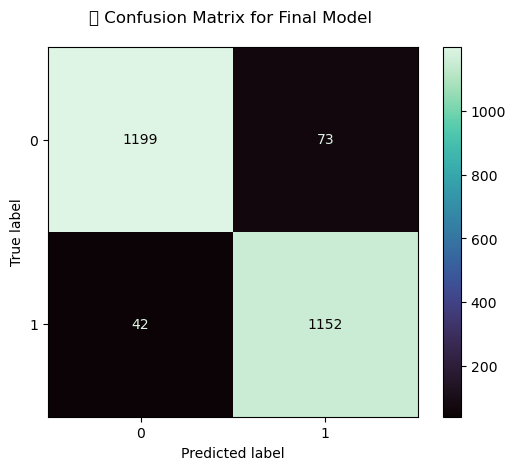

In [109]:
plt.style.use('default')
class_names = df.columns
metrics.plot_confusion_matrix(final_modelc, x_test, y_test, cmap='mako')
plt.title('\t Confusion Matrix for Final Model \n')
plt.show()

AUC ROC curve

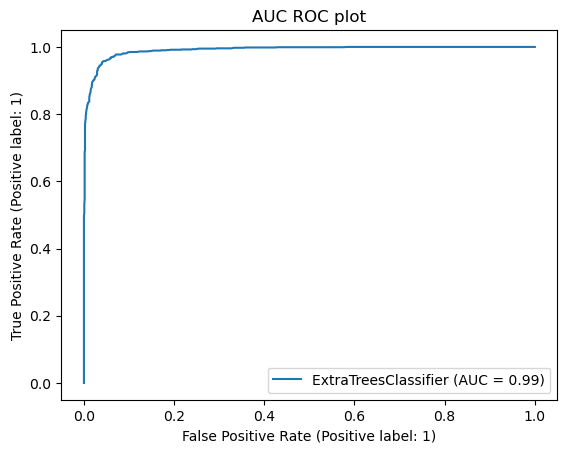

In [110]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(final_modelc, x_test, y_test)
plt.title("AUC ROC plot")
plt.show()

We got final accuracy score of 95.417% and Cross Validation Score of 79.042% and also AUC score is 0.99 which is really good.

Saving the model in pickle Format

In [111]:
# pickeling or serialization of a file
import pickle
filename = 'Rainfall_Prediction_Weather_Forecasting_Rain_Tomorrow_Final_Model.pkl'
pickle.dump(final_modelc, open(filename, 'wb'))

Prediction Conclusion

In [112]:
import numpy as np
ac=np.array(y_test)
predictedc=np.array(final_modelc.predict(x_test))
df_comparisonc = pd.DataFrame({"original":ac,"predicted":predictedc},index= range(len(ac)))
df_comparisonc

,original,predicted
0,0,0
1,0,1
2,1,1
3,1,1
4,0,0
...,...,...
2461,1,1
2462,1,1
2463,0,0
2464,1,1


Saving the comparison file as a csv file.

In [113]:
df_comparisonc.to_csv('IRainfall_Prediction_Weather_Forecasting_Rain_Tomorrow_Prediction.csv')

Saved the file as a csv.

In [114]:
new_df.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Day,Month,Year
0,1,13.4,22.9,0.470004,1.85464,7.632205,13,44.0,13,14,...,1007.1,8.000000,4.503183,16.9,21.8,0,0,1,12,2008
1,1,7.4,25.1,0.000000,1.85464,7.632205,14,44.0,6,15,...,1007.8,4.566622,4.503183,17.2,24.3,0,0,2,12,2008
2,1,12.9,25.7,0.000000,1.85464,7.632205,15,46.0,13,15,...,1008.7,4.566622,2.000000,21.0,23.2,0,0,3,12,2008
3,1,9.2,28.0,0.000000,1.85464,7.632205,4,24.0,9,0,...,1012.8,4.566622,4.503183,18.1,26.5,0,0,4,12,2008
4,1,17.5,32.3,0.693147,1.85464,7.632205,13,41.0,1,7,...,1006.0,7.000000,8.000000,17.8,29.7,0,0,5,12,2008


# (2) Prediction for Rainfall

Splitting the label and feature

In [115]:
x = new_df.drop("Rainfall", axis=1)
y = new_df["Rainfall"]

Checking Correlation

In [116]:
cor['Rainfall'].sort_values(ascending=False)

Rainfall         1.000000
RainToday        0.902769
Humidity9am      0.374141
Humidity3pm      0.357797
RainTomorrow     0.317142
Cloud9am         0.278194
Cloud3pm         0.240747
WindDir9am       0.148138
WindGustDir      0.116389
WindDir3pm       0.103933
WindGustSpeed    0.089126
MinTemp          0.080984
WindSpeed9am     0.048200
WindSpeed3pm     0.026797
Location         0.013354
Year             0.002860
Month           -0.005666
Day             -0.016476
Pressure3pm     -0.034828
Temp9am         -0.076736
Pressure9am     -0.108548
Evaporation     -0.151081
MaxTemp         -0.206494
Temp3pm         -0.215864
Sunshine        -0.221148
Name: Rainfall, dtype: float64

 RainToday has highest relation with Rainfall and sunshine has least correlation with Rainfall.

Visualizing the correlation between label and features using bar plot

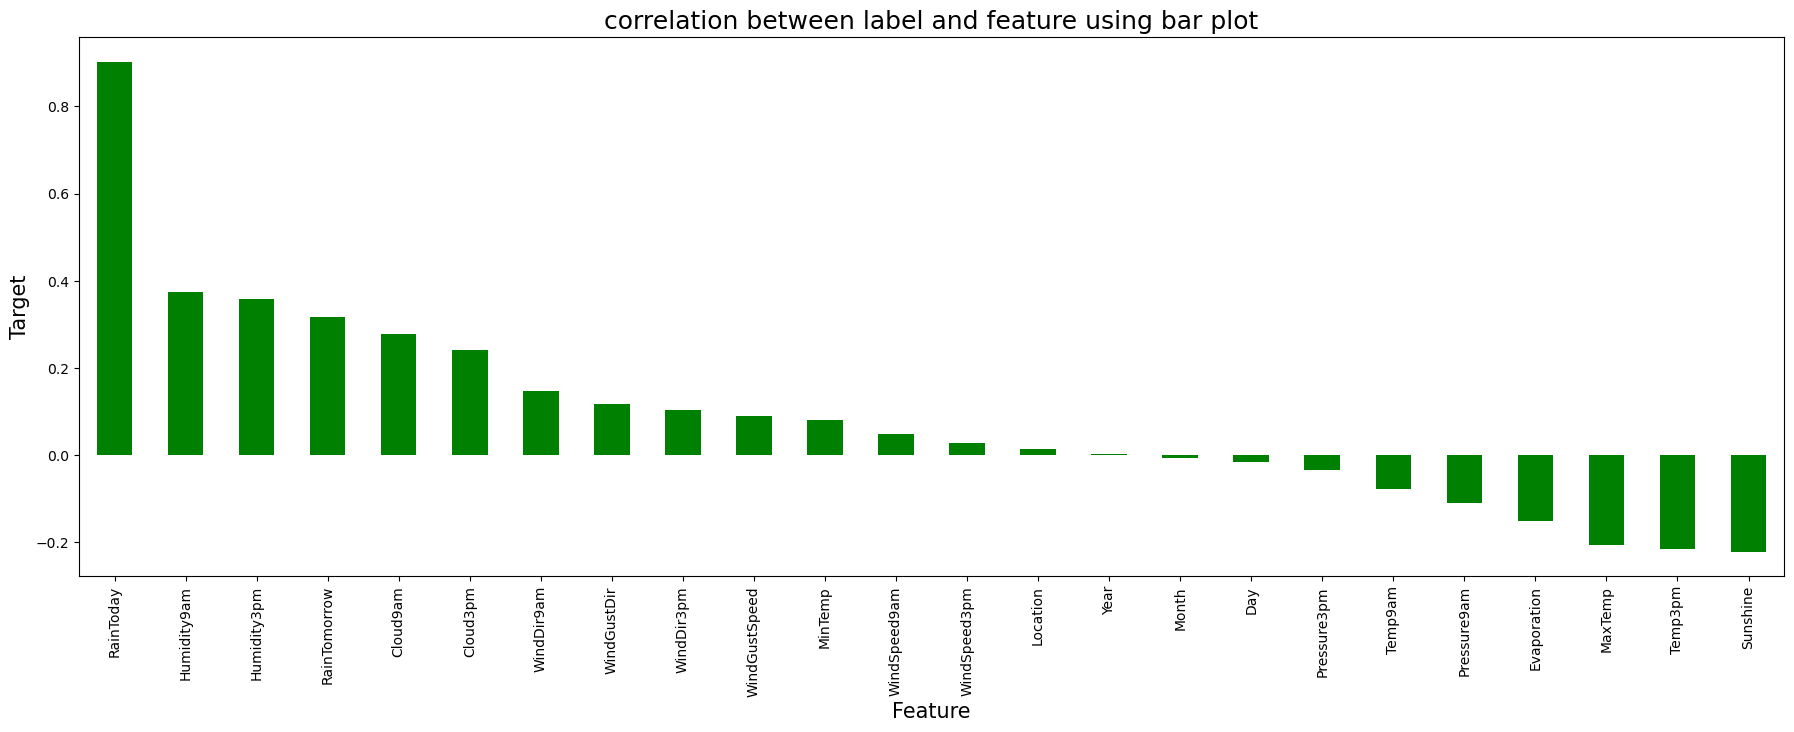

In [117]:
plt.figure(figsize=(22,7))
new_df.corr()['Rainfall'].sort_values(ascending=False).drop(['Rainfall']).plot(kind='bar',color='g')
plt.xlabel('Feature',fontsize=15)
plt.ylabel('Target',fontsize=15)
plt.title('correlation between label and feature using bar plot',fontsize=18)
plt.show()

Feature Scaling using Standard Scale

In [118]:
scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)
x

,Location,MinTemp,MaxTemp,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Day,Month,Year
0,-1.508427,0.056444,-0.145732,0.2832,-0.013374,1.229267,0.364103,1.250245,1.400214,0.712891,...,-1.398115,1.425345,0.013138,-0.138099,-0.098593,-0.542476,-0.543635,-1.671657,1.634113,-1.661315
1,-1.508427,-1.058476,0.220676,0.2832,-0.013374,1.441960,0.364103,-0.277857,1.626597,-0.987382,...,-1.279988,0.011773,0.013138,-0.084254,0.329747,-0.542476,-0.543635,-1.557976,1.634113,-1.661315
2,-1.508427,-0.036466,0.320605,0.2832,-0.013374,1.654654,0.520531,1.250245,1.626597,0.606624,...,-1.128109,0.011773,-1.076661,0.597788,0.141277,-0.542476,-0.543635,-1.444296,1.634113,-1.661315
3,-1.508427,-0.724000,0.703668,0.2832,-0.013374,-0.684977,-1.200173,0.377044,-1.769138,-0.243513,...,-0.436219,0.011773,0.013138,0.077282,0.706687,-0.542476,-0.543635,-1.330616,1.634113,-1.661315
4,-1.508427,0.818306,1.419829,0.2832,-0.013374,1.229267,0.129462,-1.369358,-0.184462,-0.668581,...,-1.583744,1.013630,1.535531,0.023437,1.254963,-0.542476,-0.543635,-1.216936,1.634113,-1.661315
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7982,1.029423,-1.913248,-0.062457,0.2832,-0.013374,-1.535751,-0.652677,0.377044,-1.542755,-0.030978,...,0.829435,0.011773,0.013138,-1.358595,0.004208,-0.542476,-0.543635,0.601949,-0.123726,2.004134
7983,1.029423,-1.764592,0.253986,0.2832,-0.013374,-0.259589,-1.356601,0.377044,-1.089991,-0.030978,...,0.626930,0.011773,0.013138,-1.215007,0.364014,-0.542476,-0.543635,0.715629,-0.123726,2.004134
7984,1.029423,-1.430116,0.520464,0.2832,-0.013374,-0.897670,-0.183394,0.377044,1.400214,-0.456047,...,0.238796,0.011773,0.013138,-0.927832,0.638152,-0.542476,-0.543635,0.829310,-0.123726,2.004134
7985,1.029423,-0.984148,0.537119,0.2832,-0.013374,0.378492,-0.887318,0.595344,-1.089991,-0.030978,...,0.188170,-0.633229,-1.076661,-0.461172,0.621019,-0.542476,-0.543635,0.942990,-0.123726,2.004134


Checking Multicollinearity

In [119]:
# Finding varience inflation factor in each scaled column
def calc_vif(x):
    vif = pd.DataFrame()
    vif["Features"] = x.columns
    vif["VIF values"] = [variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
    return(vif)

In [120]:
calc_vif(x)

,Features,VIF values
0,Location,1.581176
1,MinTemp,8.801356
2,MaxTemp,26.400793
3,Evaporation,1.532216
4,Sunshine,2.001639
5,WindGustDir,1.617841
6,WindGustSpeed,2.395013
7,WindDir9am,1.348140
8,WindDir3pm,1.484837
9,WindSpeed9am,2.015119


Multicolinearity is seen  in MaxTemp, Temp9am, Temp3pm, Pressure9am, Pressure3pm. So dropping those column

In [121]:
# Dropping MaxTemp column
x.drop("Temp3pm",axis=1,inplace=True)

In [122]:
calc_vif(x)

,Features,VIF values
0,Location,1.580516
1,MinTemp,8.765115
2,MaxTemp,9.643216
3,Evaporation,1.530431
4,Sunshine,2.001465
5,WindGustDir,1.614624
6,WindGustSpeed,2.382955
7,WindDir9am,1.347125
8,WindDir3pm,1.483838
9,WindSpeed9am,2.014485


In [123]:
# Dropping Pressure9am column
x.drop("Pressure9am",axis=1,inplace=True)

In [124]:
calc_vif(x)

,Features,VIF values
0,Location,1.580461
1,MinTemp,8.650662
2,MaxTemp,9.255287
3,Evaporation,1.513682
4,Sunshine,1.995337
5,WindGustDir,1.600111
6,WindGustSpeed,2.360172
7,WindDir9am,1.326860
8,WindDir3pm,1.413765
9,WindSpeed9am,2.014328


In [125]:
# Dropping Temp9am column
x.drop("Temp9am",axis=1,inplace=True)

In [126]:
calc_vif(x)

,Features,VIF values
0,Location,1.578231
1,MinTemp,4.501632
2,MaxTemp,5.521128
3,Evaporation,1.509234
4,Sunshine,1.987402
5,WindGustDir,1.598450
6,WindGustSpeed,2.325821
7,WindDir9am,1.326842
8,WindDir3pm,1.413360
9,WindSpeed9am,1.986469


Finding best random state

In [127]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
mod = RandomForestRegressor()

In [128]:
#For 0.3 test size
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.30, random_state=i)
    mod.fit(x_train, y_train)
    pred = mod.predict(x_test)
    acc=r2_score(y_test, pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Maximum r2 score is ",maxAccu," on Random_state ",maxRS)

Maximum r2 score is  0.8875926168762318  on Random_state  195


In [129]:
# For 0.2 test size
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.20, random_state=i)
    mod.fit(x_train, y_train)
    pred = mod.predict(x_test)
    acc=r2_score(y_test, pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Maximum r2 score is ",maxAccu," on Random_state ",maxRS)

Maximum r2 score is  0.9003237321743578  on Random_state  195


The best random state as 195 for test size 0.2

Feature Importance

,Importance
Features,
RainToday,0.809
MinTemp,0.020
Humidity9am,0.020
MaxTemp,0.013
Day,0.012
Humidity3pm,0.012
Pressure3pm,0.012
WindGustSpeed,0.011
WindSpeed9am,0.011


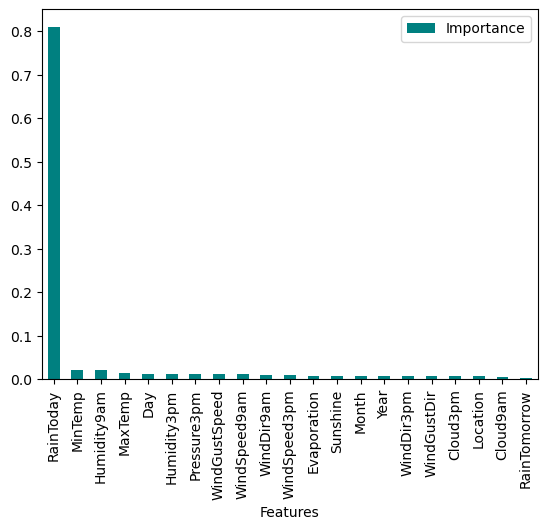

In [130]:
# Lets ckeck the feature importance using Random Forest Regressor

rfr = RandomForestRegressor()
rfr.fit(x_train, y_train)
importances = pd.DataFrame({'Features':x.columns, 'Importance':np.round(rfr.feature_importances_,3)})
importances = importances.sort_values('Importance', ascending=False).set_index('Features')
importances.plot.bar(color='teal')
importances

In [131]:
# importing all the required libraries

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import SGDRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import ExtraTreesRegressor

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

Creating train test split

In [132]:
# creating a function to run all the regressors

def regressor(model, x, y):
    x_train,x_test,y_train,y_test = train_test_split(x, y, test_size=0.2, random_state=195)
    
    # Training the model
    model.fit(x_train, y_train)
    
    # Predicting y_test
    pred = model.predict(x_test)
    
    # Root Mean Square Error (RMSE)
    rmse = mean_squared_error(y_test, pred, squared=False)
    print("Root Mean Square Error is:", rmse)
    
    # R2 score
    r2 = r2_score(y_test, pred, multioutput='variance_weighted')*100
    print("R2 Score is:", r2)
    
    # Cross Validation Score
    cv_score = (cross_val_score(model, x, y, cv=5).mean())*100
    print("Cross Validation Score is:", cv_score)
    
    # Result of r2 score - cv score
    result = r2 - cv_score
    print("R2 Score - Cross Validation Score is", result)

Linear Regression

In [133]:
model=LinearRegression()
regressor(model, x, y)

Root Mean Square Error is: 0.3454711723305512
R2 Score is: 83.37945922529566
Cross Validation Score is: 81.96404344800247
R2 Score - Cross Validation Score is 1.415415777293191


L1 -- Lasso Regression

In [134]:
model=Lasso(alpha=0.001)
regressor(model, x, y)

Root Mean Square Error is: 0.34545460544150375
R2 Score is: 83.38105324572241
Cross Validation Score is: 81.99810989680871
R2 Score - Cross Validation Score is 1.3829433489136989


L2 -- Ridge Regression

In [135]:
model=Ridge(alpha=0.001)
regressor(model, x, y)

Root Mean Square Error is: 0.34547116877384265
R2 Score is: 83.37945956752057
Cross Validation Score is: 81.96404334934422
R2 Score - Cross Validation Score is 1.4154162181763468


Elastic Net

In [136]:
model=ElasticNet(alpha=0.001)
regressor(model, x, y)

Root Mean Square Error is: 0.34542558306900784
R2 Score is: 83.383845514201
Cross Validation Score is: 81.98116526381284
R2 Score - Cross Validation Score is 1.4026802503881584


Support Vector Regression

In [137]:
model=SVR(kernel='rbf')
regressor(model, x, y)

Root Mean Square Error is: 0.3284305862507559
R2 Score is: 84.97865870487686
Cross Validation Score is: 81.66519203956125
R2 Score - Cross Validation Score is 3.313466665315616


In [138]:
model=SVR(kernel='poly')
regressor(model, x, y)

Root Mean Square Error is: 0.3440523335996325
R2 Score is: 83.51569891120376
Cross Validation Score is: 77.22070684510149
R2 Score - Cross Validation Score is 6.294992066102267


In [139]:
model=SVR(kernel='linear')
regressor(model, x, y)

Root Mean Square Error is: 0.35807390527892957
R2 Score is: 82.14471164110824
Cross Validation Score is: 81.17318383868219
R2 Score - Cross Validation Score is 0.9715278024260527


Decision Tree Regressor

In [140]:
model=DecisionTreeRegressor()
regressor(model, x, y)

Root Mean Square Error is: 0.35757325602107654
R2 Score is: 82.19460629935746
Cross Validation Score is: 74.21324275828167
R2 Score - Cross Validation Score is 7.981363541075794


Random Forest Regressor

In [141]:
model=RandomForestRegressor()
regressor(model, x, y)

Root Mean Square Error is: 0.26473783267890455
R2 Score is: 90.23991632732486
Cross Validation Score is: 85.30601952582002
R2 Score - Cross Validation Score is 4.933896801504844


In [142]:
model=RandomForestRegressor(random_state=195)
regressor(model, x, y)

Root Mean Square Error is: 0.2698398184067963
R2 Score is: 89.86010180996112
Cross Validation Score is: 85.14909335137786
R2 Score - Cross Validation Score is 4.711008458583265


K Neighbors Regressor

In [143]:
model=KNeighborsRegressor()
regressor(model, x, y)

Root Mean Square Error is: 0.3691528351387256
R2 Score is: 81.02272115276618
Cross Validation Score is: 76.73593482924603
R2 Score - Cross Validation Score is 4.286786323520147


SGD Regressor

In [144]:
model=SGDRegressor()
regressor(model, x, y)

Root Mean Square Error is: 0.3470252319870276
R2 Score is: 83.22959197758044
Cross Validation Score is: 81.87430773211929
R2 Score - Cross Validation Score is 1.3552842454611493


Gradient Boosting Regressor

In [145]:
model=GradientBoostingRegressor()
regressor(model, x, y)

Root Mean Square Error is: 0.3190826964236352
R2 Score is: 85.82157371884988
Cross Validation Score is: 82.81520211845373
R2 Score - Cross Validation Score is 3.0063716003961503


Ada Boost Regressor

In [146]:
model=AdaBoostRegressor()
regressor(model, x, y)

Root Mean Square Error is: 0.33998818603690295
R2 Score is: 83.90284316621313
Cross Validation Score is: 82.4447265811734
R2 Score - Cross Validation Score is 1.4581165850397326


Extra Trees Regressor

In [147]:
model=ExtraTreesRegressor()
regressor(model, x, y)

Root Mean Square Error is: 0.2607493560336425
R2 Score is: 90.53178716763554
Cross Validation Score is: 86.21779984160894
R2 Score - Cross Validation Score is 4.313987326026606


In [148]:
model=ExtraTreesRegressor(random_state=195)
regressor(model, x, y)

Root Mean Square Error is: 0.26399594304803387
R2 Score is: 90.2945421358368
Cross Validation Score is: 86.08883339696783
R2 Score - Cross Validation Score is 4.205708738868978


 Extra Trees Regressor gives the best results since the R2 Score - Cross Validation Score are closest along with higher Cross Validation Score and the highest R2 score comparing all the models.

Hyper parameter tuning

In [149]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.20,random_state=195)

In [150]:
x_test.shape

(1598, 21)

In [151]:
y_test.shape

(1598,)

In [152]:
x_train.shape

(6389, 21)

In [153]:
y_train.shape

(6389,)

In [154]:
ExtraTreesRegressor().get_params().keys()

dict_keys(['bootstrap', 'ccp_alpha', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'max_samples', 'min_impurity_decrease', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start'])

In [155]:
# creating parameters list to pass into GridSearchCV

parameters = {'criterion' : ['squared_error', 'absolute_error'],
              'max_features' : ['auto', 'sqrt', 'log2'],
              'n_jobs' : [-2, -1],
              'random_state' : [None, 195],
              'n_estimators': [100, 200, 300]}

In [156]:
GCV = GridSearchCV(ExtraTreesRegressor(), parameters, cv=5)

In [ ]:
GCV.fit(x_train,y_train)

In [ ]:
GCV.best_params_      # printing best parameters found by GridSearchCV

In [ ]:
final_model = ExtraTreesRegressor(criterion = 'squared_error', max_features = 'sqrt', n_jobs = -1, random_state = None, n_e

In [ ]:
final_fit = final_model.fit(x_train,y_train)   # final fit

In [ ]:
final_pred = final_model.predict(x_test)   # predicting with best parameters

In [ ]:
# final accuracy score 
best_r2=r2_score(y_test,final_pred,multioutput='variance_weighted')*100   # checking final r2_score
print("R2 score for the Best Model is:", best_r2)

In [ ]:
# final Cross Validation score 
final_cv_score = (cross_val_score(final_model, x, y, cv=5).mean())*100
print("Cross Validation Score is:", final_cv_score)

In [ ]:
plt.figure(figsize=(8,6))
plt.scatter(x=y_test, y=final_pred, color='r')
plt1 = max(max(final_pred), max(y_test))
plt2 = min(min(final_pred), min(y_test))
plt.plot([plt1, plt2], [plt1, plt2], 'b-')
plt.xlabel('Actual Rainfall', fontsize=14)
plt.ylabel('Predicted Rainfall', fontsize=14)
plt.title('ExtraTreesRegressor',fontsize=18)
plt.show()

Saving the model in pickle Format

In [ ]:
# pickeling or serialization of a file
import pickle
filename = 'Rainfall_Prediction_Weather_Forecasting_Rainfall_final_model.pkl'
pickle.dump(final_model, open(filename, 'wb'))

Prediction Conclusion:

In [ ]:
import numpy as np
a=np.array(y_test)
predicted=np.array(final_model.predict(x_test))
df_comparison = pd.DataFrame({"original":a,"predicted":predicted},index= range(len(a)))
df_comparison

Predicted the "Rainfall" using the final Model.

In [ ]:
df_comparison.to_csv('Rainfall_Prediction_Weather_Forecasting_Rainfall_Prediction.csv')

Saving the comparison file as a csv file

Thank You